# step-1 : aggrigation operation on weather_dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_regression
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [2]:
# Load the dataset
file_path = r"C:\Users\User1\Desktop\infosys springboard\datasets\wrong data\weather_features.xlsx"
energy_data = pd.read_excel(r"C:\Users\User1\Desktop\infosys springboard\datasets\energy_dataset.xlsx")
weather_data = pd.read_excel(file_path)

In [3]:
# Remove the 'city_name' column as it is not needed
weather_data = weather_data.drop(columns=['city_name'])

In [ ]:
# Here i done aggrigation on weather_data.
# there are 5 diifrent cities data of same timeline 
#i removed city name column and compresed then into single city data with help of mean and mode  

In [4]:
# Function to get the most frequent value in a series
def most_frequent(series):
    return series.mode()[0]

In [5]:
# Group by 'dt_iso' and aggregate the data
weather_data = weather_data.groupby('dt_iso').agg(
    {
        'temp': 'mean',
        'temp_min': 'mean',
        'temp_max': 'mean',
        'pressure': 'mean',
        'humidity': 'mean',
        'wind_speed': 'mean',
        'wind_deg': 'mean',
        'rain_1h': 'mean',
        'rain_3h': 'mean',
        'snow_3h': 'mean',
        'clouds_all': 'mean',
        'weather_id': 'mean',
        'weather_main': most_frequent,
        'weather_description': most_frequent,
        'weather_icon': most_frequent
    }
).reset_index()


C:\Users\User1\AppData\Local\Temp\ipykernel_8324\523555753.py:3: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  return series.mode()[0]
C:\Users\User1\AppData\Local\Temp\ipykernel_8324\523555753.py:3: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  return series.mode()[0]


In [6]:
weather_data.shape

(35064, 16)

# step-2 : merging datasets

In [7]:
#energy_data = pd.read_excel(r"C:\Users\User1\Desktop\infosys springboard\datasets\energy_dataset.xlsx")
#weather_data = pd.read_excel(r"C:\Users\User1\Desktop\infosys springboard\datasets\weather_dataset.xlsx")

In [8]:
#Ensure that both 'time' and 'dt_iso' columns are in datetime format
# Or convert timestamp columns to datetime format
# Convert time columns to datetime format and handle time zone conversion
weather_data['dt_iso'] = pd.to_datetime(weather_data['dt_iso'], utc=True).dt.tz_convert(None)
energy_data['time'] = pd.to_datetime(energy_data['time'], utc=True).dt.tz_convert(None)

In [9]:
# Merge the datasets on the time columns
merged_data = pd.merge(energy_data, weather_data, left_on='time', right_on='dt_iso', how='left')


In [10]:
# Drop the redundant 'dt_iso' column from the merged dataset
merged_data.drop(columns=['dt_iso'], inplace=True)

In [11]:
merged_data.head()

time  generation biomass   
0 2014-12-31 23:00:00               447.0  \
1 2015-01-01 00:00:00               449.0   
2 2015-01-01 01:00:00               448.0   
3 2015-01-01 02:00:00               438.0   
4 2015-01-01 03:00:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas   
0                                 329.0                                 0.0  \
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil   
0                 4844.0                       4821.0                  162.0  \
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal   
0                          0.0                     0.0                    0.0  \
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all   
0  ...         2.0     135.2      0.0      0.0      0.0         0.0  \
1  ...         2.0     135.8      0.0      0.0      0.0         0.0   
2  ...         2.4     119.0      0.0      0.0      0.0         0.0   
3  ...         2.4     119.2      0.0      0.0      0.0         0.0   
4  ...         2.4     118.4      0.0      0.0      0.0         0.0   

   weather_id  weather_main  weather_description  weather_icon  
0       800.0         clear         sky is clear           01n  
1       800.0         clear         sky is clear           01n  
2       800.0         clear         sky is clear           01n  
3       800.0         clear         sky is clear           01n  
4       800.0         clear         sky is clear           01n  

[5 rows x 44 columns]

In [12]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 44 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   time                                         35064 non-null  datetime64[ns]
 1   generation biomass                           35045 non-null  float64       
 2   generation fossil brown coal/lignite         35046 non-null  float64       
 3   generation fossil coal-derived gas           35046 non-null  float64       
 4   generation fossil gas                        35046 non-null  float64       
 5   generation fossil hard coal                  35046 non-null  float64       
 6   generation fossil oil                        35045 non-null  float64       
 7   generation fossil oil shale                  35046 non-null  float64       
 8   generation fossil peat                       35046 non-null  float64       


In [13]:
merged_data.shape

(35064, 44)

In [14]:
# Check for null values in each column
null_values = merged_data.isnull().sum()

# Display the count of null values for each column
print(null_values)

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

# step-3 : EDA operations

In [15]:
print('sum of generation hydro pumped storage aggregated column = ',merged_data['generation hydro pumped storage aggregated'].sum())
print('sum of forecast wind offshore eday ahead column =',merged_data['forecast wind offshore eday ahead'].sum())
print('sum of generation fossil oil shale column =',merged_data['generation fossil oil shale'].sum())
print('sum of generation fossil peat column =',merged_data['generation fossil peat'].sum())
print('sum of generation geothermal column =',merged_data['generation geothermal'].sum())
print('sum of generation marine column =',merged_data['generation marine'].sum())
print('sum of generation wind offshore column =',merged_data['generation wind offshore'].sum())
print('sum of rain_3h column =',merged_data['rain_3h'].sum())
print('sum of snow_3h column =',merged_data['snow_3h'].sum())
print('sum of generation fossil coal-derived gas column =',merged_data['generation fossil coal-derived gas'].sum())

sum of generation hydro pumped storage aggregated column =  0.0
sum of forecast wind offshore eday ahead column = 0.0
sum of generation fossil oil shale column = 0.0
sum of generation fossil peat column = 0.0
sum of generation geothermal column = 0.0
sum of generation marine column = 0.0
sum of generation wind offshore column = 0.0
sum of rain_3h column = 13.522385714285715
sum of snow_3h column = 169.93699999999998
sum of generation fossil coal-derived gas column = 0.0


In [16]:
# select only numerical columns
numerical_columns = merged_data.select_dtypes(include='number')

# Calculate the sum of each column which are having numericals
column_sums = numerical_columns.sum()

# Print the sum of all columns
print("Sum of all columns:")
print(column_sums.to_string())

Sum of all columns:
generation biomass                             1.344023e+07
generation fossil brown coal/lignite           1.570268e+07
generation fossil coal-derived gas             0.000000e+00
generation fossil gas                          1.970545e+08
generation fossil hard coal                    1.491581e+08
generation fossil oil                          1.045462e+07
generation fossil oil shale                    0.000000e+00
generation fossil peat                         0.000000e+00
generation geothermal                          0.000000e+00
generation hydro pumped storage aggregated     0.000000e+00
generation hydro pumped storage consumption    1.666661e+07
generation hydro run-of-river and poundage     3.406781e+07
generation hydro water reservoir               9.129885e+07
generation marine                              0.000000e+00
generation nuclear                             2.195312e+08
generation other                               2.110771e+06
generation other ren

In [17]:
#droping empty columns in merged dataset
columns_to_drop = ['generation hydro pumped storage aggregated','generation fossil coal-derived gas', 'forecast wind offshore eday ahead', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation marine', 'generation wind offshore'] 
merged_data = merged_data.drop(columns=columns_to_drop)

In [18]:
merged_data.shape # droped 7 columns which are completely empty

(35064, 36)

In [19]:
# Check for null values in each column
null_values = merged_data.isnull().sum()

# Display the count of null values for each column
print(null_values)

time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
forecast solar day ahead                        0
forecast wind onshore day ahead                 0
total load forecast                             0
total load actual                              36
price day ahead                                 0


In [20]:
# Forward fill missing values
merged_data = merged_data.ffill()

# Backward fill missing values
merged_data = merged_data.bfill()


In [21]:
# Check for null values in each column
null_values = merged_data.isnull().sum()

# Display the count of null values for each column
print(null_values)

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual        

In [22]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'price actual' column
Q1 = merged_data['total load actual'].quantile(0.25)
Q3 = merged_data['total load actual'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers_load = merged_data[(merged_data['total load actual'] < lower_bound) | (merged_data['total load actual'] > upper_bound)]
print(f"Number of outliers: {len(outliers_load)}")

Number of outliers: 0


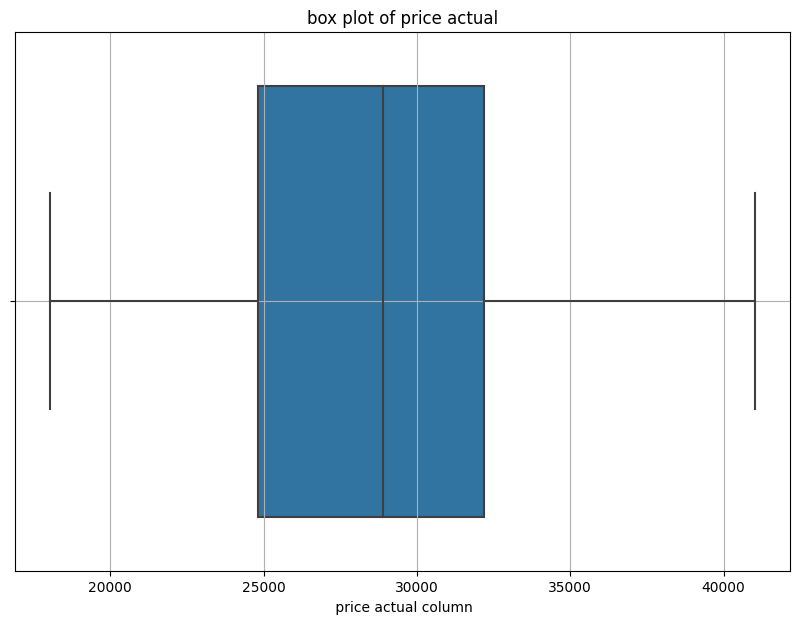

In [23]:
# Create a box plot to visualize the outliers in the 'price actual' column
plt.figure(figsize=(10,7))
sns.boxplot(x=merged_data['total load actual'])
plt.title("box plot of price actual")
plt.xlabel(" price actual column")
plt.grid(True)
plt.show()

**there are no outliers in total load actual column**

In [24]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'price actual' column
Q1 = merged_data['price actual'].quantile(0.25)
Q3 = merged_data['price actual'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = merged_data[(merged_data['price actual'] < lower_bound) | (merged_data['price actual'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 699


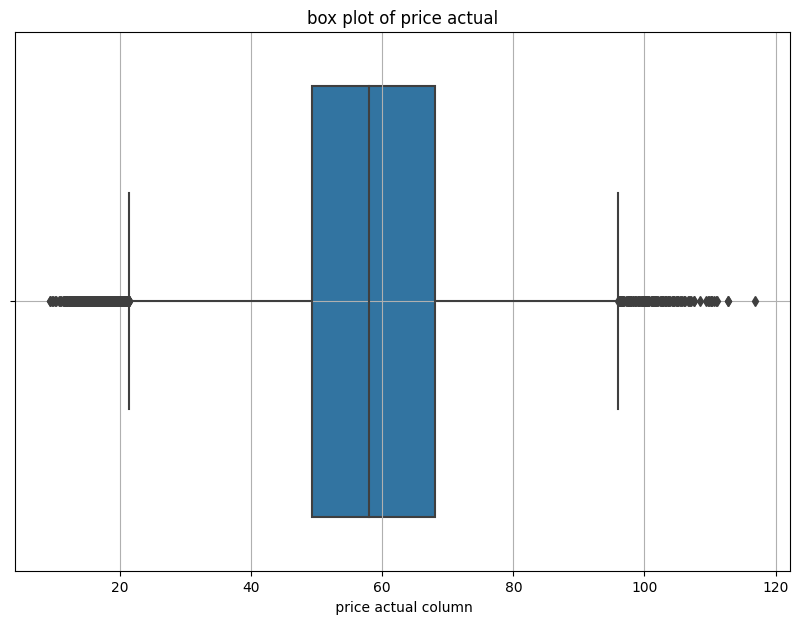

In [25]:
# Create a box plot to visualize the outliers in the 'price actual' column
plt.figure(figsize=(10,7))
sns.boxplot(x=merged_data['price actual'])
plt.title("box plot of price actual")
plt.xlabel(" price actual column")
plt.grid(True)
plt.show()

**removing ouliers of price atual column with help of interpolation**

In [26]:
# Replace outliers with NaN
merged_data['price_actual_interpolated'] = merged_data['price actual'].apply(
    lambda x: None if x < lower_bound or x > upper_bound else x
)

merged_data['price_actual_interpolated'].isnull().sum()

699

In [27]:
# Interpolate to replace NaN values
merged_data['price_actual_interpolated'] = merged_data['price_actual_interpolated'].interpolate()
merged_data['price_actual_interpolated'].isnull().sum()

0

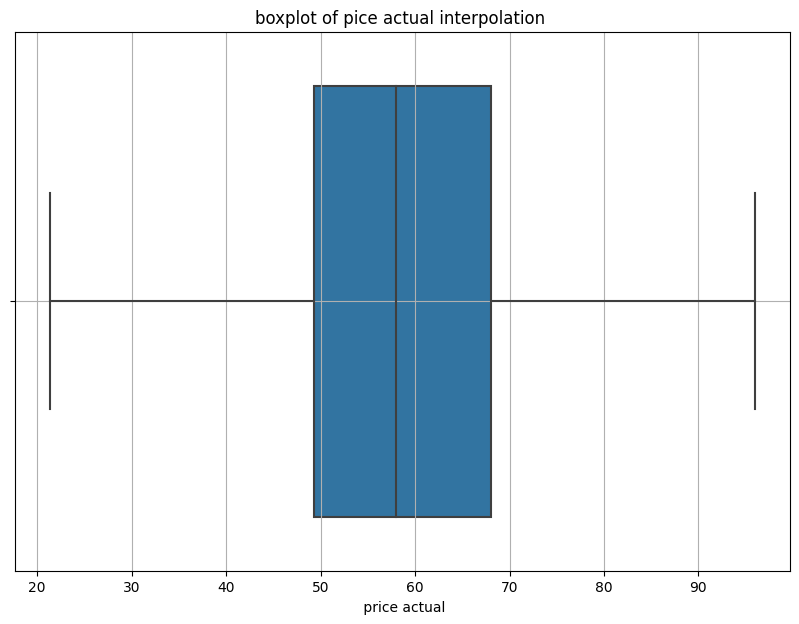

In [28]:
# Create a box plot to visualize the outliers in the 'price actual' column
plt.figure(figsize=(10,7))
sns.boxplot(x=merged_data['price_actual_interpolated'])
plt.title("boxplot of pice actual interpolation ")
plt.xlabel(" price actual")
plt.grid(True)
plt.show()

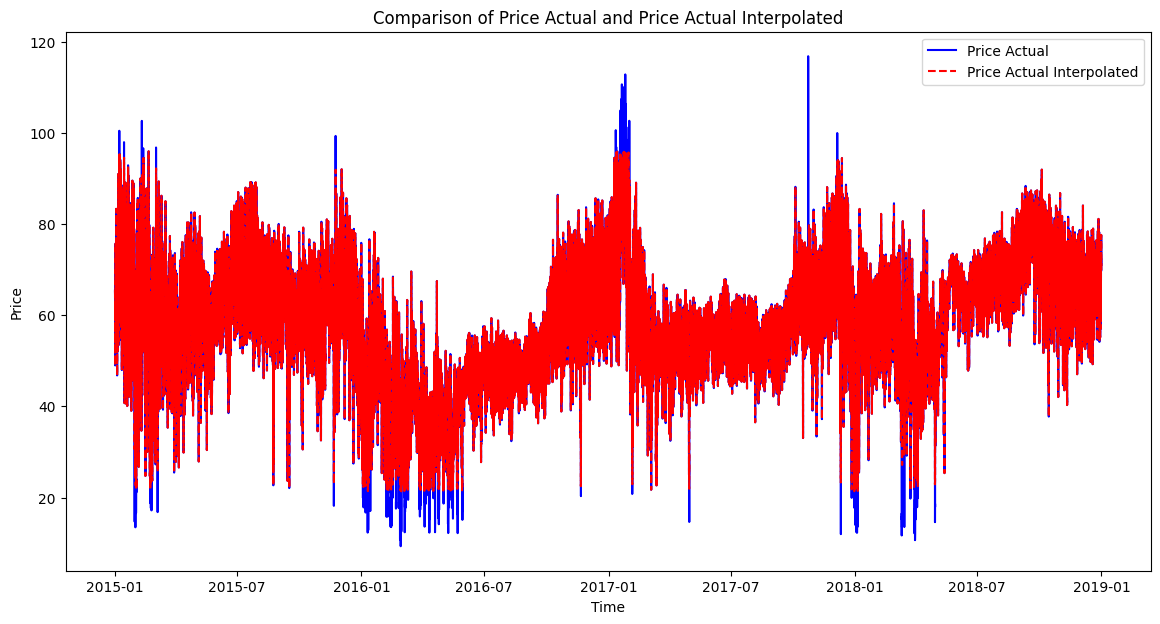

In [29]:
# Set the plot size
plt.figure(figsize=(14, 7))

# Plot the 'price actual' values
plt.plot(merged_data['time'], merged_data['price actual'], label='Price Actual', color='blue', linestyle='-')

# Plot the 'price_actual_interpolated' values
plt.plot(merged_data['time'], merged_data['price_actual_interpolated'], label='Price Actual Interpolated', color='red', linestyle='--')

# Add title and labels
plt.title('Comparison of Price Actual and Price Actual Interpolated')
plt.xlabel('Time')
plt.ylabel('Price')

# Add legend
plt.legend()

# Display the plot
plt.show()

# step-4 : feature engineering 

In [30]:
#merged_data['time'] = pd.to_datetime(merged_data['time'], utc=True).dt.tz_convert(None)

**1)creating is_weekday column**

In [31]:
# Extract the day of the week from the 'time' column
# Monday=0, Sunday=6
merged_data['day_of_week'] = merged_data['time'].dt.dayofweek

# Create a new column indicating whether the day is a weekday or weekend
merged_data['is_weekend'] = merged_data['day_of_week'].apply(lambda x: 0 if x >= 5 else 1)


**2)creting peak/oof-peak column for load and price**

In [32]:
# Extract hour from the 'time' column
merged_data['hour'] = merged_data['time'].dt.hour

# Calculate the average electricity demand for each hour across all days
hourly_avg_demand = merged_data.groupby('hour')['total load actual'].mean().reset_index()
hourly_avg_demand.columns = ['hour', 'avg_hourly_demand']

# Merge the hourly average demand back to the original dataset
merged_data = pd.merge(merged_data, hourly_avg_demand, on='hour', how='left')

# Create the 'peak\off-peak' column
merged_data['peak\off-peak_load'] = merged_data.apply(
    lambda row: 1 if row['total load actual'] > row['avg_hourly_demand'] else 0, axis=1
)

In [33]:
# Calculate the average electricity price for each hour across all days
hourly_avg_price = merged_data.groupby('hour')['price_actual_interpolated'].mean().reset_index()
hourly_avg_price.columns = ['hour', 'avg_hourly_price']

# Merge the hourly average price back to the original dataset
merged_data = pd.merge(merged_data, hourly_avg_price, on='hour', how='left')

In [34]:
# Create the 'peak\off-peak' column
merged_data['peak\\off-peak_for_price'] = merged_data.apply(
    lambda row: 1 if row['price_actual_interpolated'] > row['avg_hourly_price'] else 0, axis=1
)

**3) creating season columns**

In [35]:
# Extract the month from the 'time' column
merged_data['month'] = merged_data['time'].dt.month

# Define a function to map months to seasons
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    
# Apply the function to create the 'season' column
merged_data['season'] = merged_data['month'].apply(month_to_season)

# Calculate the total demand for each hour (sum of all generation types)
#demand_columns = df.filter(like='generation').columns
#df['total_demand'] = df[demand_columns].sum(axis=1)

# Calculate average demand for each season
average_seasonal_demand = merged_data.groupby('season')['total load actual'].mean()
# Calculate average price for each season
average_seasonal_price = merged_data.groupby('season')['price_actual_interpolated'].mean()

**4) creating is_weekend column**

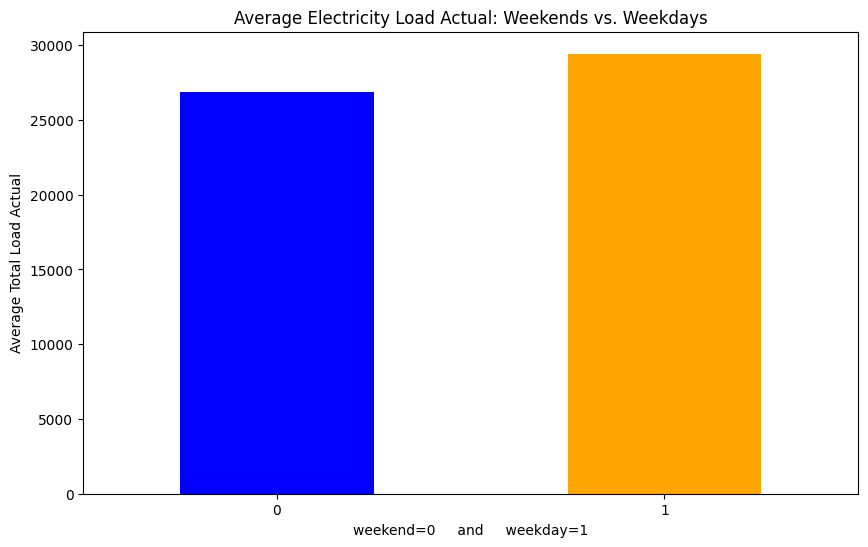

In [36]:
# Calculate average demand for weekdays and weekends
average_demand = merged_data.groupby('is_weekend')['total load actual'].mean()

# Plot the average demand for weekdays and weekends
plt.figure(figsize=(10, 6))
average_demand.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Electricity Load Actual: Weekends vs. Weekdays')
plt.xlabel('weekend=0     and     weekday=1')
plt.ylabel('Average Total Load Actual')
plt.xticks(rotation=0)
plt.show()


In [37]:
print(average_demand)

is_weekend
0    26883.628489
1    29424.591962
Name: total load actual, dtype: float64


**with help of avg_hourly_demand column I ploted graph of hourly average demand of 24 hrs** 

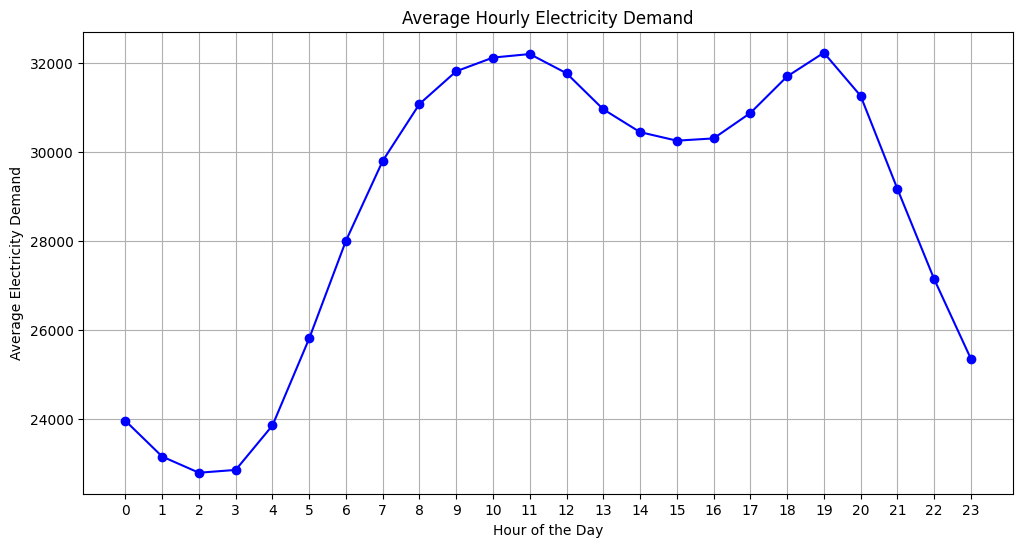

In [38]:
# Plot the average hourly electricity demand
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg_demand['hour'], hourly_avg_demand['avg_hourly_demand'], marker='o', linestyle='-', color='b')
plt.title('Average Hourly Electricity Demand')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Electricity Demand')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**with help of avg_hourly_price column I ploted graph of hourly average price of 24 hrs** 

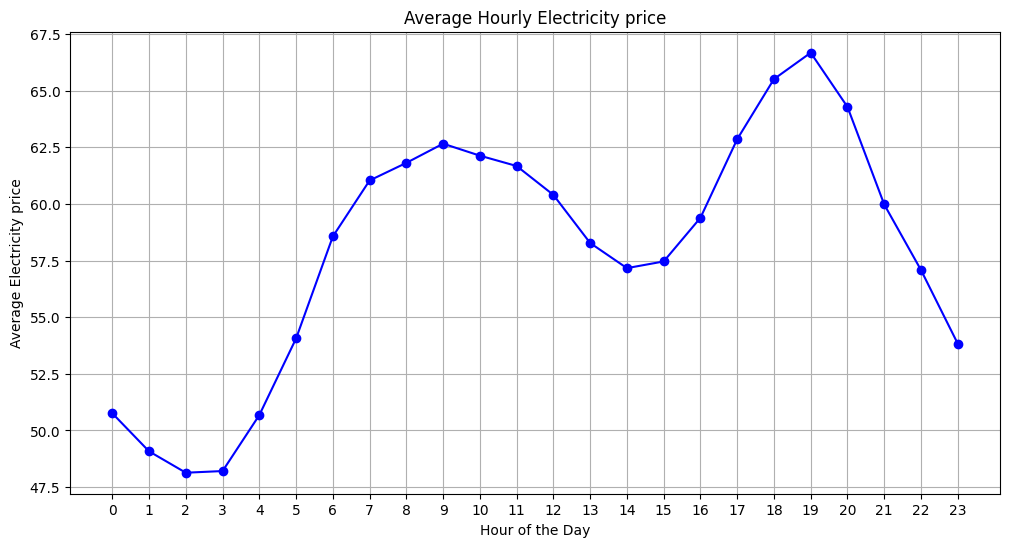

In [39]:
# Plot the average hourly electricity price
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg_price['hour'], hourly_avg_price['avg_hourly_price'], marker='o', linestyle='-', color='b')
plt.title('Average Hourly Electricity price')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Electricity price')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**we can observe that both the laod and price graphs looks similar**

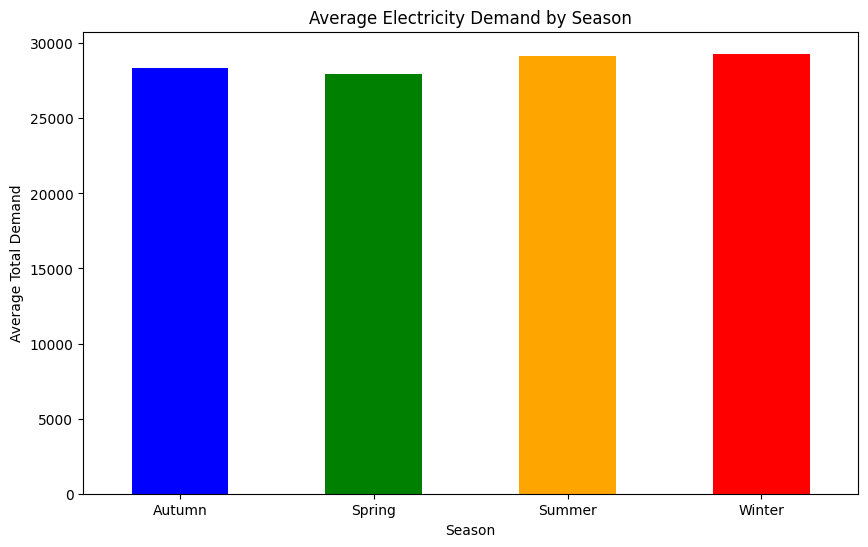

In [40]:
# Plot the average demand for each season
plt.figure(figsize=(10, 6))
average_seasonal_demand.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('Average Electricity Demand by Season')
plt.xlabel('Season')
plt.ylabel('Average Total Demand')
plt.xticks(rotation=0)
plt.show()


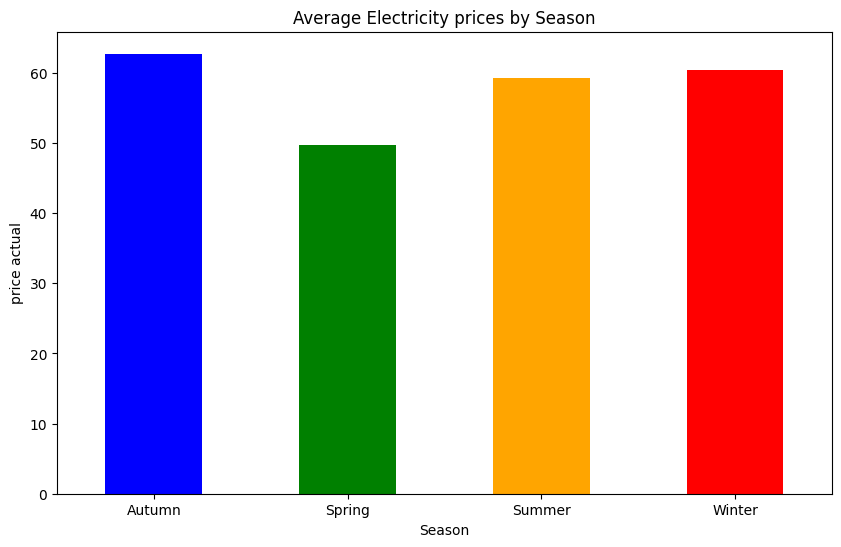

In [41]:
# Plot the average demand for each season
plt.figure(figsize=(10, 6))
average_seasonal_price.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('Average Electricity prices by Season')
plt.xlabel('Season')
plt.ylabel('price actual')
plt.xticks(rotation=0)
plt.show()

**ploting average monthly demand of all years** 

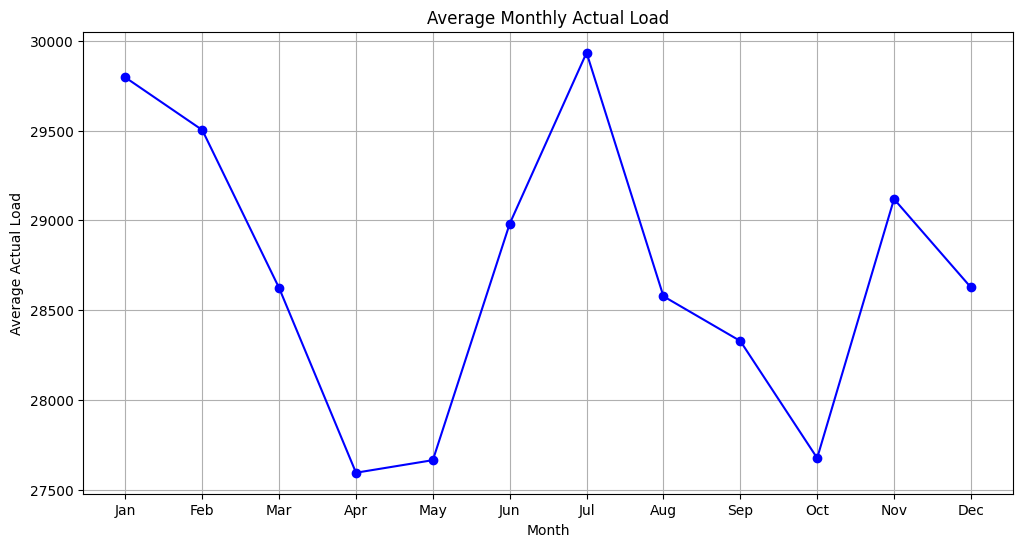

In [42]:
# Calculate the average actual load for each month across all years
monthly_avg_load = merged_data.groupby('month')['total load actual'].mean().reset_index()

# Plot the average monthly actual load
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_load['month'], monthly_avg_load['total load actual'], marker='o', linestyle='-', color='b')
plt.title('Average Monthly Actual Load')
plt.xlabel('Month')
plt.ylabel('Average Actual Load')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

**ploting average monthly price of all years** 

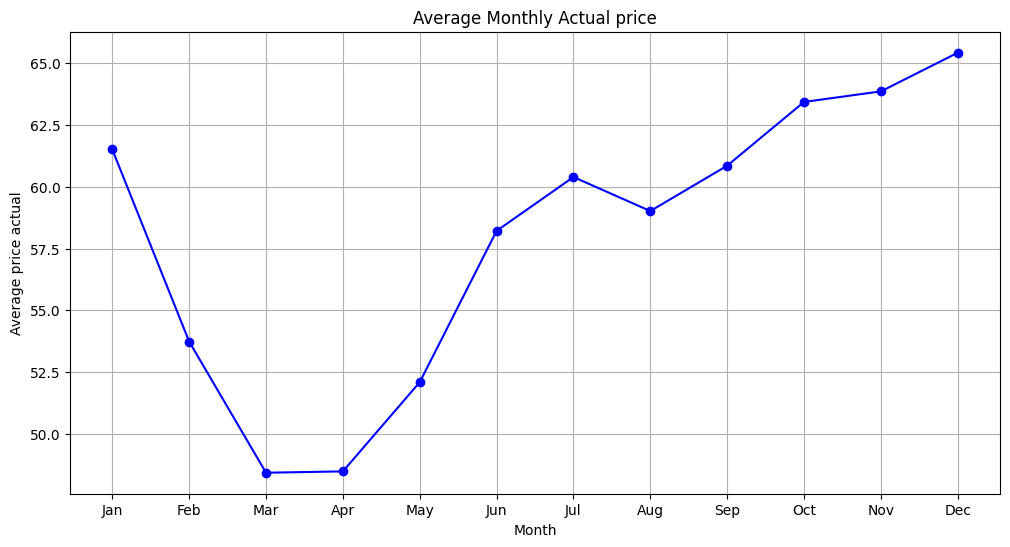

In [43]:
# Calculate the average actual price for each month across all years
monthly_avg_load = merged_data.groupby('month')['price_actual_interpolated'].mean().reset_index()

# Plot the average monthly actual price
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_load['month'], monthly_avg_load['price_actual_interpolated'], marker='o', linestyle='-', color='b')
plt.title('Average Monthly Actual price')
plt.xlabel('Month')
plt.ylabel('Average price actual')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


In [44]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 46 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   time                                         35064 non-null  datetime64[ns]
 1   generation biomass                           35064 non-null  float64       
 2   generation fossil brown coal/lignite         35064 non-null  float64       
 3   generation fossil gas                        35064 non-null  float64       
 4   generation fossil hard coal                  35064 non-null  float64       
 5   generation fossil oil                        35064 non-null  float64       
 6   generation hydro pumped storage consumption  35064 non-null  float64       
 7   generation hydro run-of-river and poundage   35064 non-null  float64       
 8   generation hydro water reservoir             35064 non-null  float64       


**performing one-hot encoding on "day_of_week" and "month" columns to create week days and months**

In [45]:
# Apply one-hot encoding to the 'month' and 'day_of_week' columns
merged_data = pd.get_dummies(merged_data, columns=['day_of_week'])
merged_data = pd.get_dummies(merged_data, columns=['month'])

In [46]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 63 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   time                                         35064 non-null  datetime64[ns]
 1   generation biomass                           35064 non-null  float64       
 2   generation fossil brown coal/lignite         35064 non-null  float64       
 3   generation fossil gas                        35064 non-null  float64       
 4   generation fossil hard coal                  35064 non-null  float64       
 5   generation fossil oil                        35064 non-null  float64       
 6   generation hydro pumped storage consumption  35064 non-null  float64       
 7   generation hydro run-of-river and poundage   35064 non-null  float64       
 8   generation hydro water reservoir             35064 non-null  float64       


In [47]:
# Define a dictionary with old column names as keys and new column names as values
column_renaming_dict = {
    'month_1': 'Jan',
    'month_2': 'Feb',
    'month_3': 'Mar', 
    'month_4': 'Apr',
    'month_5': 'May',
    'month_6': 'Jun',
    'month_7': 'Jul',
    'month_8': 'Aug',
    'month_9': 'Sep',
    'month_10': 'Oct',
    'month_11': 'Nov',
    'month_12': 'Dec',
    'day_of_week_0': 'Mon',
    'day_of_week_1': 'Tus',
    'day_of_week_2': 'Wed',
    'day_of_week_3': 'Thur',
    'day_of_week_4': 'Fri',
    'day_of_week_5': 'Sat',
    'day_of_week_6': 'Sun',
}

# Rename the columns
merged_data.rename(columns=column_renaming_dict, inplace=True)

**checking how many columns will create if i performed one-hot encoding on "weather_main","weather_description" and "weather_icon"**

In [48]:
# Find the unique objects in the 'Weather' column
unique_weather_main_values = merged_data['weather_main'].unique() 
unique_weather_description_values = merged_data['weather_description'].unique()
unique_weather_icon_values = merged_data['weather_icon'].unique()
print(f"Unique objects in 'weather_main' column: {unique_weather_main_values}")
print(merged_data['weather_main'].nunique())
print(f"Unique objects in 'weather_description' column: {unique_weather_description_values}")
print(merged_data['weather_description'].nunique())
print(f"Unique objects in 'weather_icon' column: {unique_weather_icon_values}")
print(merged_data['weather_icon'].nunique())

Unique objects in 'weather_main' column: ['clear' 'clouds' 'rain' 'fog' 'thunderstorm' 'drizzle' 'mist' 'haze']
8
Unique objects in 'weather_description' column: ['sky is clear' 'few clouds' 'broken clouds' 'scattered clouds'
 'light rain' 'overcast clouds' 'moderate rain' 'heavy intensity rain'
 'fog' 'mist' 'dust' 'drizzle' 'light intensity drizzle'
 'light intensity shower rain' 'haze' 'light intensity drizzle rain'
 'shower rain' 'proximity thunderstorm' 'proximity shower rain'
 'thunderstorm' 'light snow' 'heavy intensity shower rain']
22
Unique objects in 'weather_icon' column: ['01n' '01d' 1 2 '04n' '04d' 3 '02d' '02n' 4 '10n' '03n' 10 '03d' '10d'
 '50n' '50d' '09n' '11d' '11n' '09d']
21


**performing label encoding on "weather_main","weather_description" and "weather_icon" columns to reduce the exyra unwanted columns**

In [49]:
# Ensure all values in the columns are strings
merged_data['weather_main'] = merged_data['weather_main'].astype(str)
merged_data['weather_description'] = merged_data['weather_description'].astype(str)
merged_data['weather_icon'] = merged_data['weather_icon'].astype(str)

# Initialize the label encoder
label_encoder = LabelEncoder()

# Convert columns to strings and apply label encoding
label_mappings = {}

for column in ['weather_main', 'weather_description', 'weather_icon']:
    merged_data[column] = label_encoder.fit_transform(merged_data[column])
    label_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the first few rows to verify the changes
print(merged_data.head())

# Display the mappings
for column, mapping in label_mappings.items():
    print(f"Mappings for {column}:")
    print(mapping)
    print()


                 time  generation biomass   
0 2014-12-31 23:00:00               447.0  \
1 2015-01-01 00:00:00               449.0   
2 2015-01-01 01:00:00               448.0   
3 2015-01-01 02:00:00               438.0   
4 2015-01-01 03:00:00               428.0   

   generation fossil brown coal/lignite  generation fossil gas   
0                                 329.0                 4844.0  \
1                                 328.0                 5196.0   
2                                 323.0                 4857.0   
3                                 254.0                 4314.0   
4                                 187.0                 4130.0   

   generation fossil hard coal  generation fossil oil   
0                       4821.0                  162.0  \
1                       4755.0                  158.0   
2                       4581.0                  157.0   
3                       4131.0                  160.0   
4                       3840.0                 

In [50]:
# Apply one-hot encoding to the'season' columns
merged_data = pd.get_dummies(merged_data, columns=['season'])

In [51]:
merged_data.shape

(35064, 66)

# correlation matrix

In [52]:
# Identify all boolean columns
bool_columns = merged_data.select_dtypes(include=['bool']).columns

# Convert all boolean columns to integers
merged_data[bool_columns] = merged_data[bool_columns].astype(int)

<Axes: >

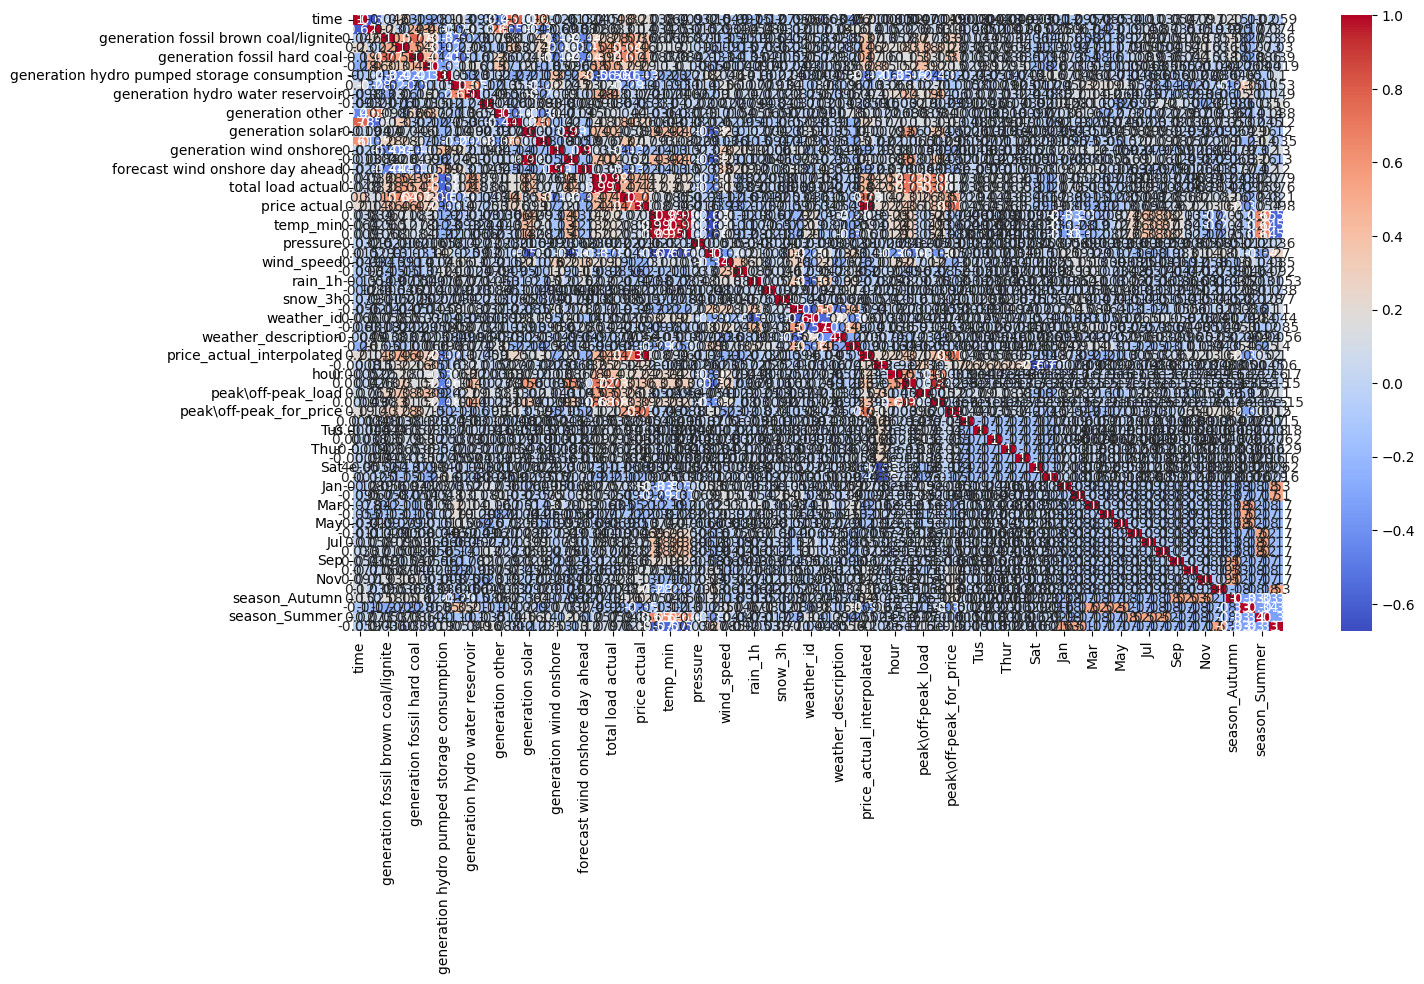

In [53]:
plt.figure(figsize=(15,8))
correlation = merged_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

**taking only common columns which are having correlation above 0.1**

Columns with correlation greater than 0.0 for price actual:
forecast solar day ahead                0.101402
Oct                                     0.120049
Nov                                     0.125683
generation biomass                      0.142688
Dec                                     0.161130
generation waste                        0.168735
peak\off-peak_load                      0.175879
season_Autumn                           0.196807
time                                    0.209150
is_weekend                              0.217831
hour                                    0.237381
generation other renewable              0.255544
generation fossil oil                   0.285021
generation fossil brown coal/lignite    0.363986
avg_hourly_demand                       0.364914
avg_hourly_price                        0.388391
total load actual                       0.435573
total load forecast                     0.435864
generation fossil gas                   0.461423
generatio

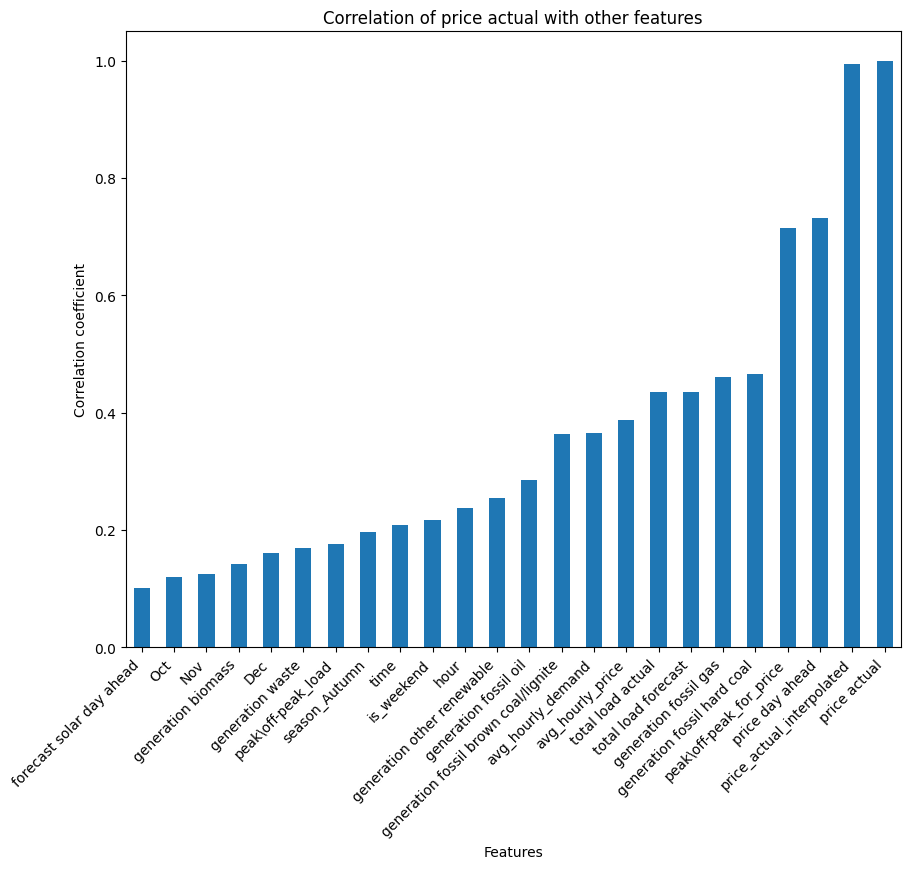

Columns with correlation greater than 0.0 for total load actual:
generation other                              0.100768
generation hydro run-of-river and poundage    0.118340
peak\off-peak_for_price                       0.118962
generation other renewable                    0.180955
wind_speed                                    0.194858
temp_max                                      0.198534
temp                                          0.203489
temp_min                                      0.203735
is_weekend                                    0.250964
generation fossil brown coal/lignite          0.280729
generation solar                              0.395609
hour                                          0.395730
generation fossil hard coal                   0.396947
forecast solar day ahead                      0.404001
price actual                                  0.435573
price_actual_interpolated                     0.436888
price day ahead                               0.474102


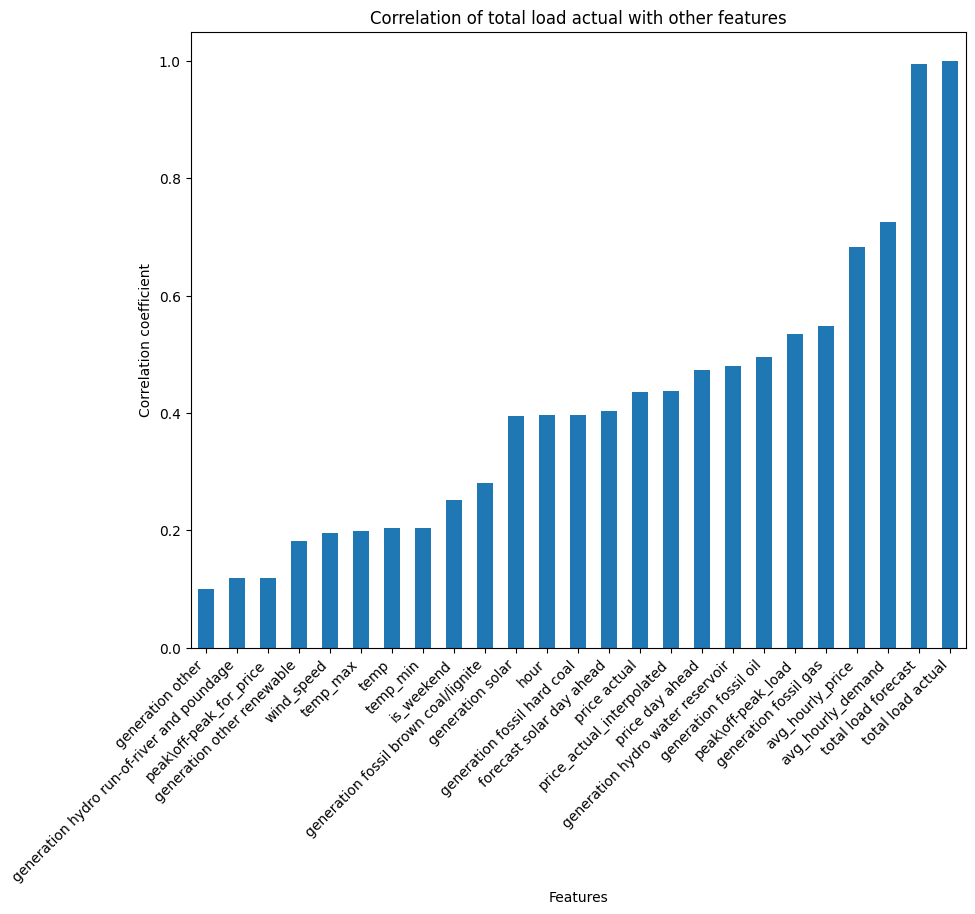

Common columns with correlation greater than 0.0 for both target variables:
{'total load forecast', 'generation fossil brown coal/lignite', 'avg_hourly_price', 'peak\\off-peak_for_price', 'price actual', 'hour', 'price_actual_interpolated', 'price day ahead', 'is_weekend', 'generation other renewable', 'avg_hourly_demand', 'total load actual', 'forecast solar day ahead', 'generation fossil oil', 'generation fossil gas', 'generation fossil hard coal', 'peak\\off-peak_load'}
Number of common columns: 17


In [50]:
# Define the target columns
target_columns = ['price actual', 'total load actual']

# Initialize a dictionary to hold positive correlations for each target column
positive_correlations_dict = {}

for target_column in target_columns:
    # Calculate correlations of the target column with all other columns
    correlations = merged_data.corr()[target_column].sort_values()

    # Filter out correlations greater than 0.1
    positive_correlations = correlations[correlations > 0.1]
    positive_correlations_dict[target_column] = set(positive_correlations.index)

    # Print the columns with correlations greater than 0.1
    print(f"Columns with correlation greater than 0.0 for {target_column}:")
    print(positive_correlations)

    # Plot the correlations
    plt.figure(figsize=(10, 8))
    positive_correlations.plot(kind='bar')
    plt.title(f'Correlation of {target_column} with other features')
    plt.xlabel('Features')
    plt.ylabel('Correlation coefficient')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    

# Find the common columns that have a correlation greater than 0.1 for both target variables
common_columns = set.intersection(*positive_correlations_dict.values())

# Print the common columns
print("Common columns with correlation greater than 0.0 for both target variables:")
print(common_columns)
print("Number of common columns:", len(common_columns))


**using techniques to find features for price**

In [51]:
# Define the feature matrix X and target vector y
leak_columns = ['time','price actual', 'price day ahead', 'avg_hourly_price', 'price_actual_interpolated']
X = merged_data.drop(columns=leak_columns)
y = merged_data['price_actual_interpolated']

# Correlation Analysis
correlation = X.corrwith(y).abs().sort_values(ascending=False)
top_corr_features = correlation.head(10)
print("Top features based on correlation:\n", top_corr_features)

# RandomForestRegressor for Feature Importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
top_rf_features = rf_importance.head(10)
print("\nTop features based on RandomForestRegressor:\n", top_rf_features)

# Lasso Regression for Feature Importance
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X, y)
lasso_importance = pd.Series(lasso.coef_, index=X.columns).sort_values(ascending=False)
top_lasso_features = lasso_importance.head(10)
print("\nTop features based on Lasso Regression:\n", top_lasso_features)

# Mutual Information for Feature Importance
mutual_info = mutual_info_regression(X, y)
mi_importance = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)
top_mi_features = mi_importance.head(10)
print("\nTop features based on Mutual Information:\n", top_mi_features)

# Combining top features from all methods
combined_top_features = pd.concat([top_corr_features, top_rf_features, top_lasso_features, top_mi_features]).drop_duplicates().index
print("\nCombined top features from all methods:\n", combined_top_features)


Top features based on correlation:
 peak\off-peak_for_price                        0.726025
generation fossil hard coal                    0.467277
generation fossil gas                          0.461871
total load forecast                            0.437057
total load actual                              0.436888
generation hydro pumped storage consumption    0.423514
avg_hourly_demand                              0.369101
generation fossil brown coal/lignite           0.365563
season_Spring                                  0.351016
generation fossil oil                          0.283044
dtype: float64

Top features based on RandomForestRegressor:
 peak\off-peak_for_price                       0.527321
avg_hourly_demand                             0.137202
generation fossil hard coal                   0.044064
generation fossil gas                         0.022898
generation other renewable                    0.017889
generation hydro run-of-river and poundage    0.016893
wind_speed  

**using techniques to find features for load**

In [52]:
# Define the feature matrix X and target vector y
leak_columns = ['time','total load forecast', 'avg_hourly_demand']
X = merged_data.drop(columns=leak_columns)
y = merged_data['total load actual']

# Correlation Analysis
correlation = X.corrwith(y).abs().sort_values(ascending=False)
top_corr_features = correlation.head(10)
print("Top features based on correlation:\n", top_corr_features)

# RandomForestRegressor for Feature Importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
top_rf_features = rf_importance.head(10)
print("\nTop features based on RandomForestRegressor:\n", top_rf_features)

# Lasso Regression for Feature Importance
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X, y)
lasso_importance = pd.Series(lasso.coef_, index=X.columns).sort_values(ascending=False)
top_lasso_features = lasso_importance.head(10)
print("\nTop features based on Lasso Regression:\n", top_lasso_features)

# Mutual Information for Feature Importance
mutual_info = mutual_info_regression(X, y)
mi_importance = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)
top_mi_features = mi_importance.head(10)
print("\nTop features based on Mutual Information:\n", top_mi_features)

# Combining top features from all methods
combined_top_features = pd.concat([top_corr_features, top_rf_features, top_lasso_features, top_mi_features]).drop_duplicates().index
print("\nCombined top features from all methods:\n", combined_top_features)

Top features based on correlation:
 total load actual                              1.000000
avg_hourly_price                               0.682449
generation hydro pumped storage consumption    0.562769
generation fossil gas                          0.548990
peak\off-peak_load                             0.534054
generation fossil oil                          0.496173
generation hydro water reservoir               0.479253
price day ahead                                0.474102
price_actual_interpolated                      0.436888
price actual                                   0.435573
dtype: float64

Top features based on RandomForestRegressor:
 total load actual             9.999993e-01
generation other renewable    7.485619e-08
generation biomass            4.852076e-08
wind_deg                      4.753948e-08
generation solar              4.523710e-08
generation nuclear            4.236571e-08
forecast solar day ahead      3.459557e-08
temp_max                      2.707346e-0

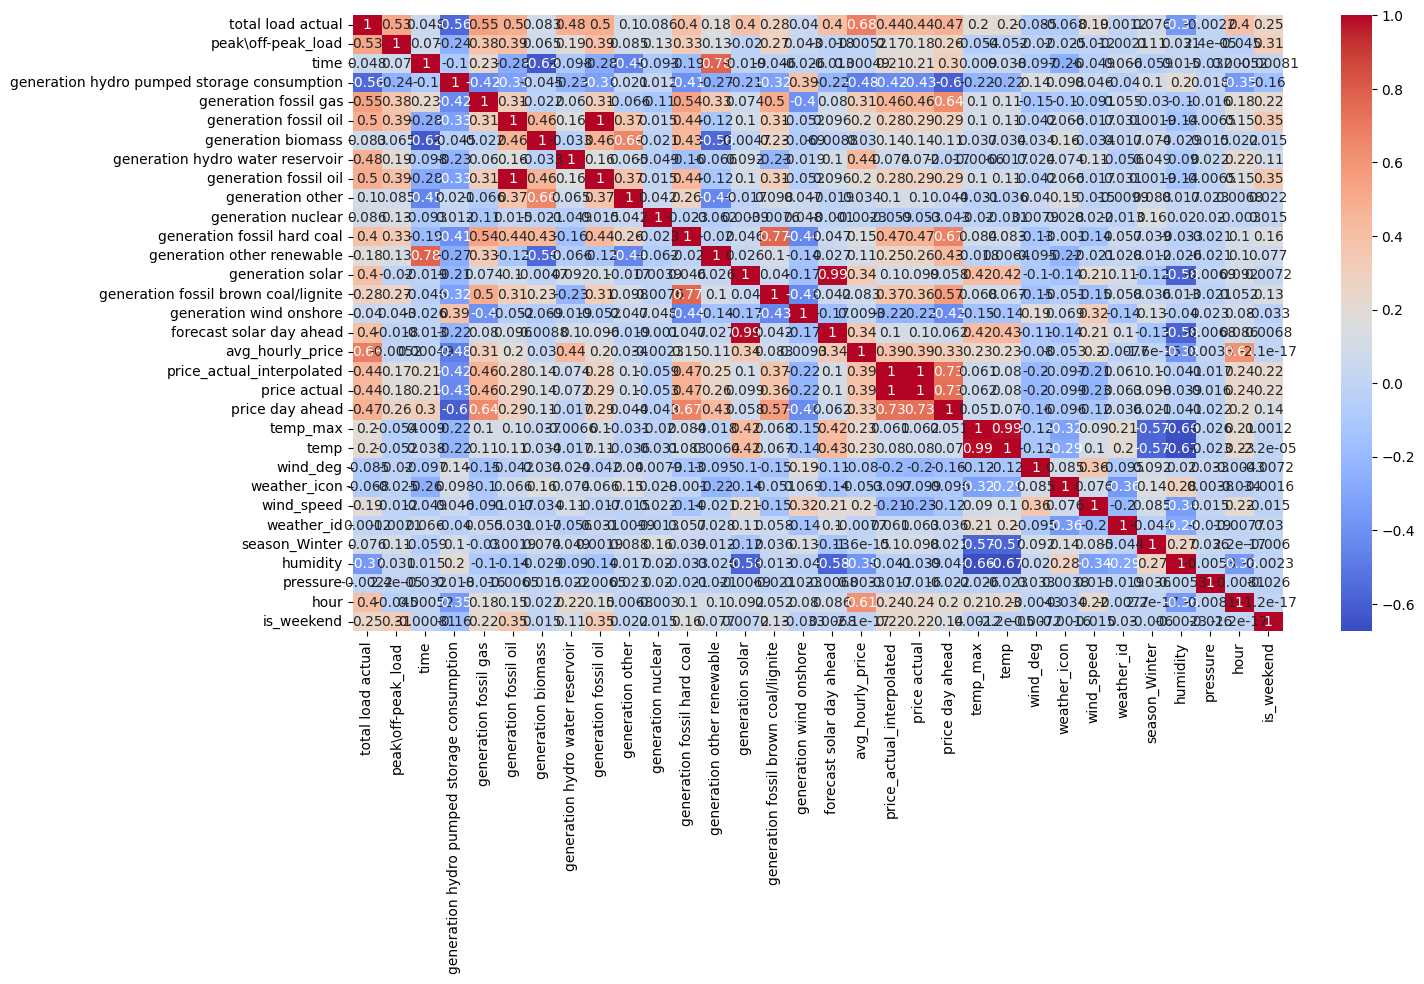

In [54]:
# List of columns those are common for load target variables
columns_for_load =['total load actual','peak\off-peak_load','time',  
       'generation hydro pumped storage consumption', 'generation fossil gas','generation fossil oil', 'generation biomass',
       'generation hydro water reservoir','generation fossil oil','generation other','generation nuclear','generation fossil hard coal'
       ,'generation other renewable','generation solar','generation fossil brown coal/lignite','generation wind onshore','forecast solar day ahead',
       'avg_hourly_price','price_actual_interpolated', 'price actual','price day ahead',
       'temp_max','temp','wind_deg', 'weather_icon', 'wind_speed', 'weather_id','season_Winter','humidity','pressure',
       'hour','is_weekend'] 
# Create a subset of the dataset with only the columns of interest
subset_data_load = merged_data[columns_for_load]

# Compute the correlation matrix
correlation = subset_data_load.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

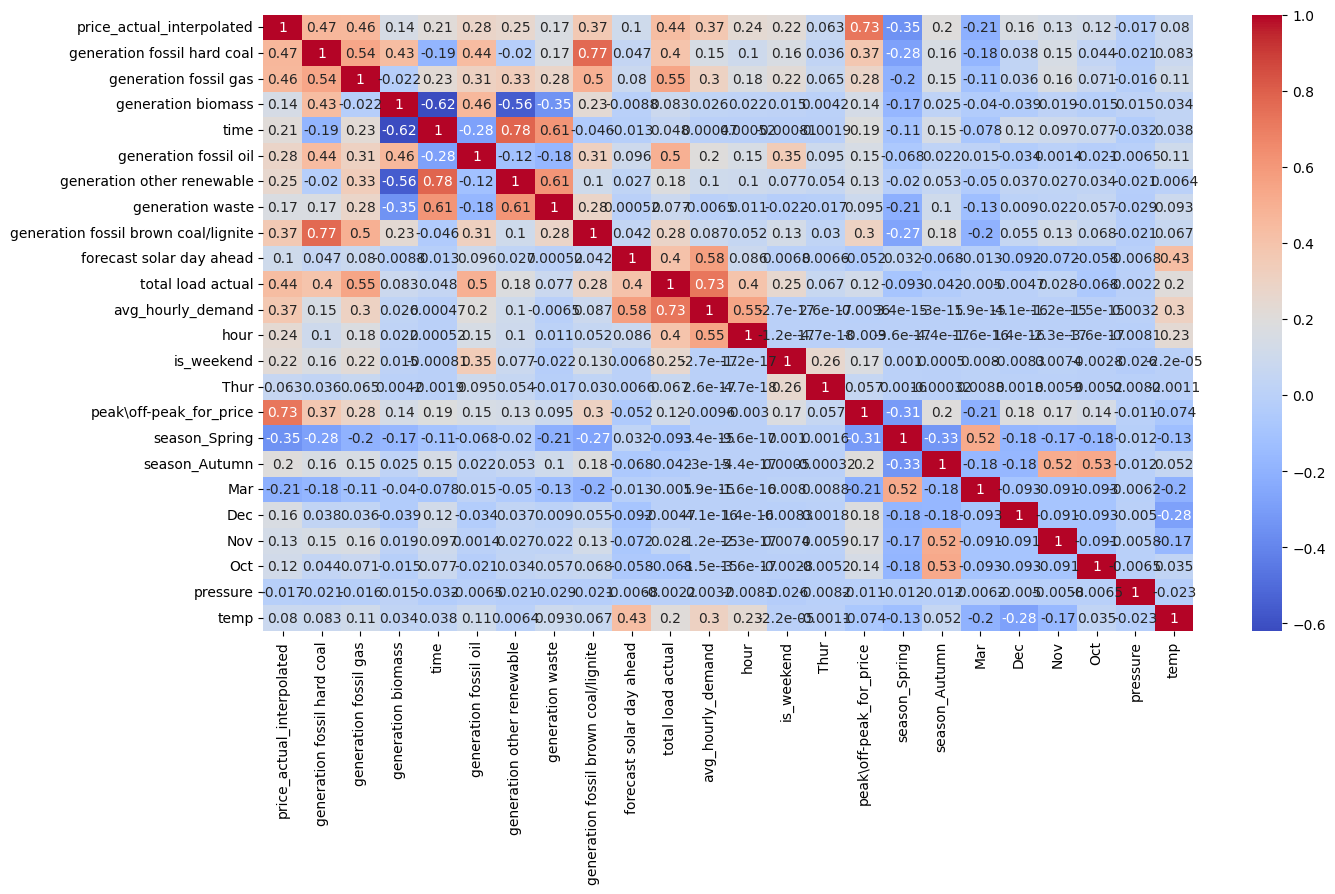

In [55]:
# List of columns those are common for price target variables
columns_for_price =['price_actual_interpolated','generation fossil hard coal','generation fossil gas','generation biomass','time',
'generation fossil oil','generation other renewable','generation waste','generation fossil brown coal/lignite',
'forecast solar day ahead','total load actual','avg_hourly_demand','hour','is_weekend',"Thur"
,'peak\\off-peak_for_price','season_Spring','season_Autumn','Mar','Dec','Nov','Oct','pressure','temp']

# Create a subset of the dataset with only the columns of interest
subset_data_price = merged_data[columns_for_price]

# Compute the correlation matrix
correlation_1 = subset_data_price.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_1, annot=True, cmap='coolwarm')
plt.show()

# ---------------------------------------------------------------------------------------------------------------

# RandomForest model

In [69]:
# Create a default random forest model
default_rf = RandomForestRegressor()

# Print the default number of trees
print(f"Default number of trees: {default_rf.n_estimators}")


Default number of trees: 100


In [70]:
# Initialize a RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Print the default parameters
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


# 1) total load  actual rf


Load Prediction - Validation Set
MAE: 689.1614130899758
RMSE: 911.6193889215539
MAPE: 0.02463800911125076
R²: 0.9600518559591181
Adjusted R²: 0.9598802082476849

Load Prediction - Test Set
MAE: 704.1609724796805
RMSE: 937.2714315228817
MAPE: 0.025174056249616033
R²: 0.9578828333015043
Adjusted R²: 0.9577018658135417


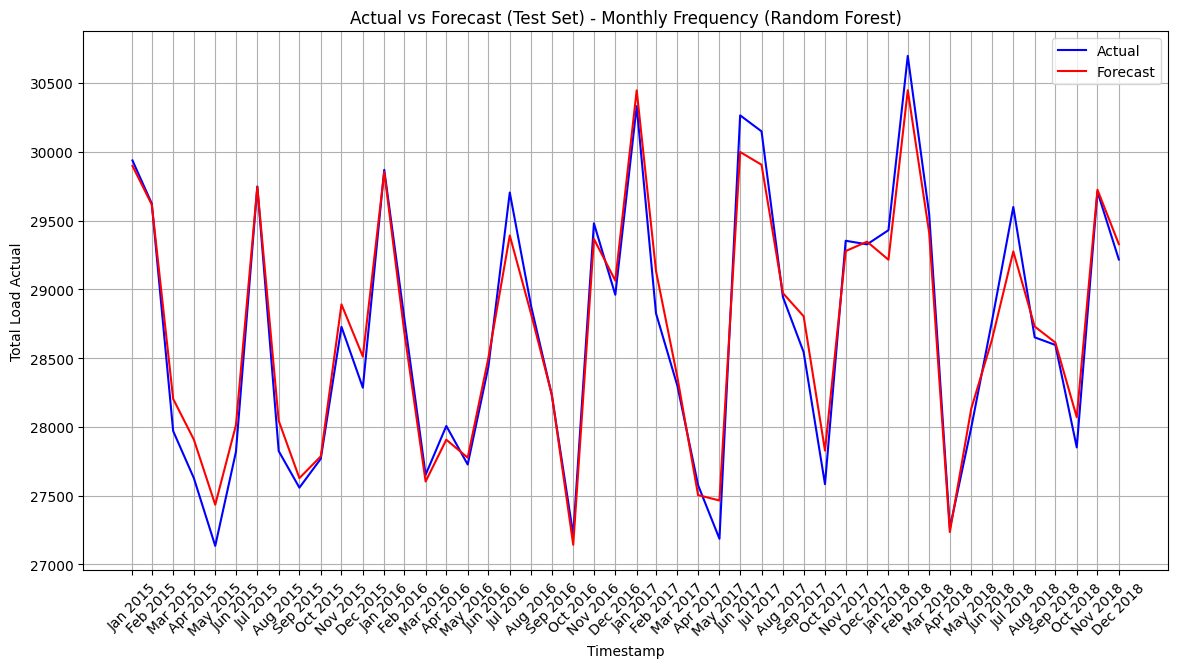

In [87]:

# Define target variable
y_load = subset_data_load['total load actual']

# Define feature set, excluding the timestamp column
X_load = subset_data_load.drop(columns=['total load actual', timestamp_col])

# Split data into training, validation, and test sets
X_load_train, X_load_temp, y_load_train, y_load_temp = train_test_split(
    X_load, y_load, test_size=0.4, random_state=42)
X_load_val, X_load_test, y_load_val, y_load_test = train_test_split(
    X_load_temp, y_load_temp, test_size=0.5, random_state=42)

# Function to calculate adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

# Random Forest model for load prediction with 100 trees
model_load = RandomForestRegressor(n_estimators=100, random_state=42)
model_load.fit(X_load_train, y_load_train)

# Predict on validation set for load
y_load_val_pred = model_load.predict(X_load_val)

# Calculate evaluation metrics for load prediction on validation set
mae_load_val = mean_absolute_error(y_load_val, y_load_val_pred)
rmse_load_val = np.sqrt(mean_squared_error(y_load_val, y_load_val_pred))
mape_load_val = mean_absolute_percentage_error(y_load_val, y_load_val_pred)
r2_load_val = r2_score(y_load_val, y_load_val_pred)
adj_r2_load_val = adjusted_r2(r2_load_val, X_load_val.shape[0], X_load_val.shape[1])

print("\nLoad Prediction - Validation Set")
print(f"MAE: {mae_load_val}")
print(f"RMSE: {rmse_load_val}")
print(f"MAPE: {mape_load_val}")
print(f"R²: {r2_load_val}")
print(f"Adjusted R²: {adj_r2_load_val}")

# Final evaluation on test set for load prediction
y_load_test_pred = model_load.predict(X_load_test)

mae_load_test = mean_absolute_error(y_load_test, y_load_test_pred)
rmse_load_test = np.sqrt(mean_squared_error(y_load_test, y_load_test_pred))
mape_load_test = mean_absolute_percentage_error(y_load_test, y_load_test_pred)
r2_load_test = r2_score(y_load_test, y_load_test_pred)
adj_r2_load_test = adjusted_r2(r2_load_test, X_load_test.shape[0], X_load_test.shape[1])

print("\nLoad Prediction - Test Set")
print(f"MAE: {mae_load_test}")
print(f"RMSE: {rmse_load_test}")
print(f"MAPE: {mape_load_test}")
print(f"R²: {r2_load_test}")
print(f"Adjusted R²: {adj_r2_load_test}")

# Create DataFrame for actual and predicted values
load_results_df_rf = pd.DataFrame({
    'Timestamp': subset_data_load[timestamp_col].values[X_load_test.index],
    'Actual': y_load_test,
    'Predicted': y_load_test_pred
})

# Set the timestamp as the index
load_results_df_rf.set_index('Timestamp', inplace=True)

# Add Month and Year columns for better readability
load_results_df_rf['Month'] = load_results_df_rf.index.month
load_results_df_rf['Year'] = load_results_df_rf.index.year

# Resample the data to monthly frequency and calculate the mean
load_results_monthly_rf = load_results_df_rf.resample('M').mean()

# Plot Actual vs Forecast for the test set at monthly frequency
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(load_results_monthly_rf.index, load_results_monthly_rf['Actual'], label='Actual', color='blue')

# Plot predicted values
plt.plot(load_results_monthly_rf.index, load_results_monthly_rf['Predicted'], label='Forecast', color='red')

# Add month and year labels to the x-axis
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(load_results_monthly_rf.index, rotation=45)

plt.title('Actual vs Forecast (Test Set) - Monthly Frequency (Random Forest)')
plt.xlabel('Timestamp')
plt.ylabel('Total Load Actual')
plt.legend()
plt.grid(True)
plt.show()


# hyper parameter tuning for total load

***hyper parameter from 0 to 200 with common interval as 10***

In [128]:
# Define target variable
y_load = subset_data_load['total load actual']

# Define feature separametert
X_load = subset_data_load.drop(columns=['total load actual'])

# Split data into training, validation, and test sets for load prediction
X_load_train, X_load_temp, y_load_train, y_load_temp = train_test_split(X_load, y_load, test_size=0.4, random_state=42)
X_load_val, X_load_test, y_load_val, y_load_test = train_test_split(X_load_temp, y_load_temp, test_size=0.5, random_state=42)

# Function to calculate adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': list(range(0, 201, 5)),  # Ranging from 100 to 200
    'max_features': ['sqrt']
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the training data
grid_search.fit(X_load_train, y_load_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_

# Predict on validation set for load
y_load_val_pred = best_rf.predict(X_load_val)

# Calculate evaluation metrics for load prediction on validation set
mae_load_val = mean_absolute_error(y_load_val, y_load_val_pred)
rmse_load_val = np.sqrt(mean_squared_error(y_load_val, y_load_val_pred))
mape_load_val = mean_absolute_percentage_error(y_load_val, y_load_val_pred)
r2_load_val = r2_score(y_load_val, y_load_val_pred)
adj_r2_load_val = adjusted_r2(r2_load_val, X_load_val.shape[0], X_load_val.shape[1])

print("\nLoad Prediction - Validation Set")
print(f"MAE: {mae_load_val}")
print(f"RMSE: {rmse_load_val}")
print(f"MAPE: {mape_load_val}")
print(f"R²: {r2_load_val}")
print(f"Adjusted R²: {adj_r2_load_val}")

# Final evaluation on test set for load prediction
y_load_test_pred = best_rf.predict(X_load_test)

mae_load_test = mean_absolute_error(y_load_test, y_load_test_pred)
rmse_load_test = np.sqrt(mean_squared_error(y_load_test, y_load_test_pred))
mape_load_test = mean_absolute_percentage_error(y_load_test, y_load_test_pred)
r2_load_test = r2_score(y_load_test, y_load_test_pred)
adj_r2_load_test = adjusted_r2(r2_load_test, X_load_test.shape[0], X_load_test.shape[1])

print("\nLoad Prediction - Test Set")
print(f"MAE: {mae_load_test}")
print(f"RMSE: {rmse_load_test}")
print(f"MAPE: {mape_load_test}")
print(f"R²: {r2_load_test}")
print(f"Adjusted R²: {adj_r2_load_test}")


Fitting 3 folds for each of 41 candidates, totalling 123 fits


C:\Users\User1\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 123.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User1\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User1\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\User1\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 600, in _validate_params
    valida

Best Parameters:  {'max_features': 'sqrt', 'n_estimators': 200}
Best Score:  -1027686.1671296548

Load Prediction - Validation Set
MAE: 702.3358398688151
RMSE: 918.8412464171303
MAPE: 0.025059514853741197
R²: 0.9594164097277335
Adjusted R²: 0.9592420316543779

Load Prediction - Test Set
MAE: 721.4351147868246
RMSE: 947.776900344192
MAPE: 0.025776654315465188
R²: 0.9569333959432905
Adjusted R²: 0.9567483489479165


**hyper parameter as 1000 rf**


Load Prediction with 1000 Trees - Validation Set
MAE: 682.2040322258663
RMSE: 902.5456181253717
MAPE: 0.024404765688609966
R²: 0.9608431430682242
Adjusted R²: 0.9606748953300469

Load Prediction with 1000 Trees - Test Set
MAE: 696.8853835733638
RMSE: 926.8734168703821
MAPE: 0.024927148832806587
R²: 0.9588121387177461
Adjusted R²: 0.9586351642350094


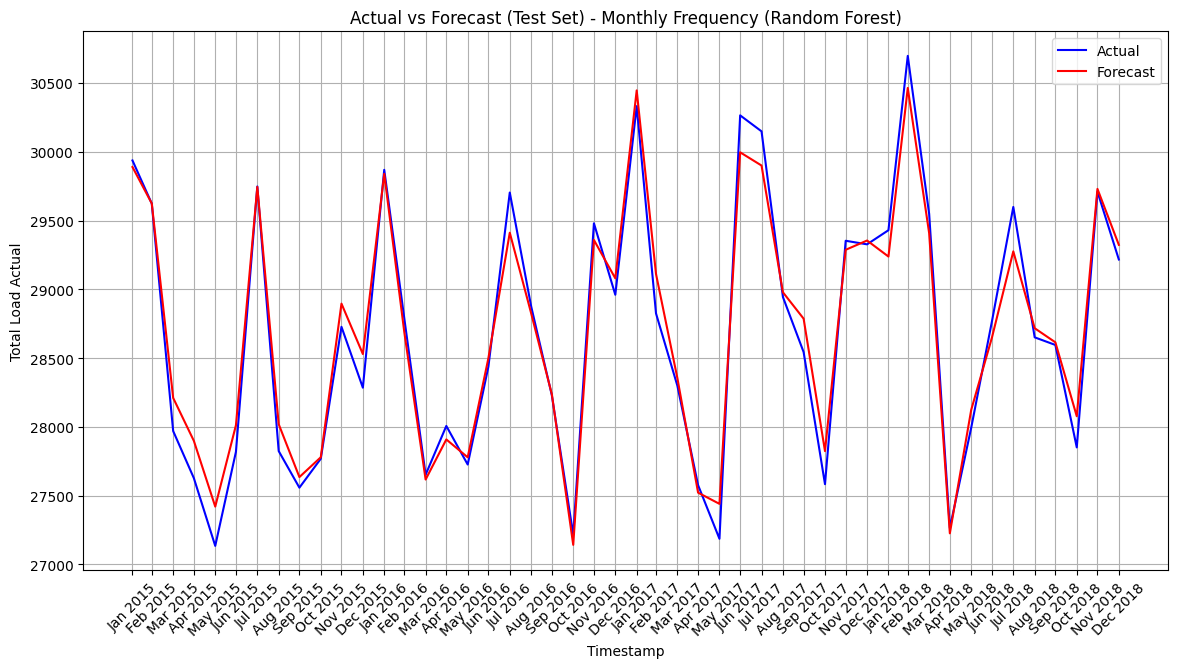

In [91]:
# Define target variable
y_load = subset_data_load['total load actual']
timestamp_col= "time"
# Define feature set, excluding the timestamp column
X_load = subset_data_load.drop(columns=['total load actual', timestamp_col])

# Split data into training, validation, and test sets
X_load_train, X_load_temp, y_load_train, y_load_temp = train_test_split(
    X_load, y_load, test_size=0.4, random_state=42)
X_load_val, X_load_test, y_load_val, y_load_test = train_test_split(
    X_load_temp, y_load_temp, test_size=0.5, random_state=42)

# Function to calculate adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

# Random Forest model for load prediction with 1000 trees
model_load = RandomForestRegressor(n_estimators=1000, random_state=42)
model_load.fit(X_load_train, y_load_train)

# Predict on validation set for load
y_load_val_pred = model_load.predict(X_load_val)

# Calculate evaluation metrics for load prediction on validation set
mae_load_val = mean_absolute_error(y_load_val, y_load_val_pred)
rmse_load_val = np.sqrt(mean_squared_error(y_load_val, y_load_val_pred))
mape_load_val = mean_absolute_percentage_error(y_load_val, y_load_val_pred)
r2_load_val = r2_score(y_load_val, y_load_val_pred)
adj_r2_load_val = adjusted_r2(r2_load_val, X_load_val.shape[0], X_load_val.shape[1])

print("\nLoad Prediction with 1000 Trees - Validation Set")
print(f"MAE: {mae_load_val}")
print(f"RMSE: {rmse_load_val}")
print(f"MAPE: {mape_load_val}")
print(f"R²: {r2_load_val}")
print(f"Adjusted R²: {adj_r2_load_val}")

# Final evaluation on test set for load prediction
y_load_test_pred = model_load.predict(X_load_test)

mae_load_test = mean_absolute_error(y_load_test, y_load_test_pred)
rmse_load_test = np.sqrt(mean_squared_error(y_load_test, y_load_test_pred))
mape_load_test = mean_absolute_percentage_error(y_load_test, y_load_test_pred)
r2_load_test = r2_score(y_load_test, y_load_test_pred)
adj_r2_load_test = adjusted_r2(r2_load_test, X_load_test.shape[0], X_load_test.shape[1])

print("\nLoad Prediction with 1000 Trees - Test Set")
print(f"MAE: {mae_load_test}")
print(f"RMSE: {rmse_load_test}")
print(f"MAPE: {mape_load_test}")
print(f"R²: {r2_load_test}")
print(f"Adjusted R²: {adj_r2_load_test}")

# Create DataFrame for actual and predicted values
load_results_df_rf = pd.DataFrame({
    'Timestamp': subset_data_load[timestamp_col].values[X_load_test.index],
    'Actual': y_load_test,
    'Predicted': y_load_test_pred
})

# Set the timestamp as the index
load_results_df_rf.set_index('Timestamp', inplace=True)

# Add Month and Year columns for better readability
load_results_df_rf['Month'] = load_results_df_rf.index.month
load_results_df_rf['Year'] = load_results_df_rf.index.year

# Resample the data to monthly frequency and calculate the mean
load_results_monthly_rf = load_results_df_rf.resample('M').mean()

# Plot Actual vs Forecast for the test set at monthly frequency
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(load_results_monthly_rf.index, load_results_monthly_rf['Actual'], label='Actual', color='blue')

# Plot predicted values
plt.plot(load_results_monthly_rf.index, load_results_monthly_rf['Predicted'], label='Forecast', color='red')

# Add month and year labels to the x-axis
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(load_results_monthly_rf.index, rotation=45)

plt.title('Actual vs Forecast (Test Set) - Monthly Frequency (Random Forest)')
plt.xlabel('Timestamp')
plt.ylabel('Total Load Actual')
plt.legend()
plt.grid(True)
plt.show()

**2)price actual**


Price Prediction - Validation Set
MAE: 3.0653545447152086
RMSE: 4.157950665610336
MAPE: 0.058982798813482895
R²: 0.9065469011434234
Adjusted R²: 0.9062527712185529

Price Prediction - Test Set
MAE: 3.0540501887110167
RMSE: 4.162721195572226
MAPE: 0.05816002944126079
R²: 0.9091785219595001
Adjusted R²: 0.9088926746752525


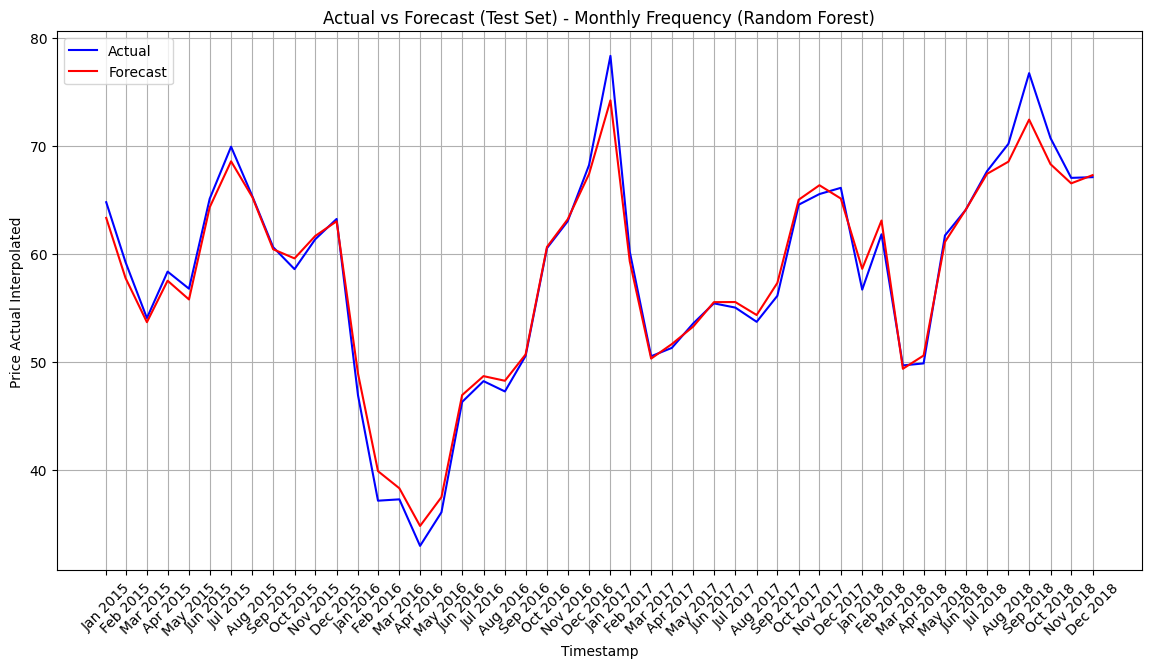

In [92]:
# Define target variable
y_price = subset_data_price['price_actual_interpolated']
timestamp_col = "time"

# Define feature set, excluding the timestamp column
X_price = subset_data_price.drop(columns=['price_actual_interpolated', timestamp_col])

# Split data into training, validation, and test sets
X_price_train, X_price_temp, y_price_train, y_price_temp = train_test_split(
    X_price, y_price, test_size=0.4, random_state=42)
X_price_val, X_price_test, y_price_val, y_price_test = train_test_split(
    X_price_temp, y_price_temp, test_size=0.5, random_state=42)

# Function to calculate adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

# Random Forest model for price prediction
model_price = RandomForestRegressor(n_estimators=100, random_state=42)
model_price.fit(X_price_train, y_price_train)

# Predict on validation set for price
y_price_val_pred = model_price.predict(X_price_val)

# Calculate evaluation metrics for price prediction on validation set
mae_price_val = mean_absolute_error(y_price_val, y_price_val_pred)
rmse_price_val = np.sqrt(mean_squared_error(y_price_val, y_price_val_pred))
mape_price_val = mean_absolute_percentage_error(y_price_val, y_price_val_pred)
r2_price_val = r2_score(y_price_val, y_price_val_pred)
adj_r2_price_val = adjusted_r2(r2_price_val, X_price_val.shape[0], X_price_val.shape[1])

print("\nPrice Prediction - Validation Set")
print(f"MAE: {mae_price_val}")
print(f"RMSE: {rmse_price_val}")
print(f"MAPE: {mape_price_val}")
print(f"R²: {r2_price_val}")
print(f"Adjusted R²: {adj_r2_price_val}")

# Final evaluation on test set for price prediction
y_price_test_pred = model_price.predict(X_price_test)

mae_price_test = mean_absolute_error(y_price_test, y_price_test_pred)
rmse_price_test = np.sqrt(mean_squared_error(y_price_test, y_price_test_pred))
mape_price_test = mean_absolute_percentage_error(y_price_test, y_price_test_pred)
r2_price_test = r2_score(y_price_test, y_price_test_pred)
adj_r2_price_test = adjusted_r2(r2_price_test, X_price_test.shape[0], X_price_test.shape[1])

print("\nPrice Prediction - Test Set")
print(f"MAE: {mae_price_test}")
print(f"RMSE: {rmse_price_test}")
print(f"MAPE: {mape_price_test}")
print(f"R²: {r2_price_test}")
print(f"Adjusted R²: {adj_r2_price_test}")

# Create DataFrame for actual and predicted values
price_results_df_rf = pd.DataFrame({
    'Timestamp': subset_data_price[timestamp_col].values[X_price_test.index],
    'Actual': y_price_test,
    'Predicted': y_price_test_pred
})

# Set the timestamp as the index
price_results_df_rf.set_index('Timestamp', inplace=True)

# Add Month and Year columns for better readability
price_results_df_rf['Month'] = price_results_df_rf.index.month
price_results_df_rf['Year'] = price_results_df_rf.index.year

# Resample the data to monthly frequency and calculate the mean
price_results_monthly_rf = price_results_df_rf.resample('M').mean()

# Plot Actual vs Forecast for the test set at monthly frequency
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(price_results_monthly_rf.index, price_results_monthly_rf['Actual'], label='Actual', color='blue')

# Plot predicted values
plt.plot(price_results_monthly_rf.index, price_results_monthly_rf['Predicted'], label='Forecast', color='red')

# Add month and year labels to the x-axis
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(price_results_monthly_rf.index, rotation=45)

plt.title('Actual vs Forecast (Test Set) - Monthly Frequency (Random Forest)')
plt.xlabel('Timestamp')
plt.ylabel('Price Actual Interpolated')
plt.legend()
plt.grid(True)
plt.show()

# hyper parameter from 0 to 1000 with common interval as 100

In [126]:
# Define target variable
y_price = subset_data_price['price_actual_interpolated']

# Define feature set
X_price = subset_data_price.drop(columns=['price_actual_interpolated'])

# Split data into training, validation, and test sets for price prediction
X_price_train, X_price_temp, y_price_train, y_price_temp = train_test_split(X_price, y_price, test_size=0.4, random_state=42)
X_price_val, X_price_test, y_price_val, y_price_test = train_test_split(X_price_temp, y_price_temp, test_size=0.5, random_state=42)

# Function to calculate adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': list(range(0, 1001, 100)),  # Values from 0 to 200 with a step of 10
    'max_features': ['sqrt']
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the training data
grid_search.fit(X_price_train, y_price_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_

# Predict on validation set for price
y_price_val_pred = best_rf.predict(X_price_val)

# Calculate evaluation metrics for price prediction on validation set
mae_price_val = mean_absolute_error(y_price_val, y_price_val_pred)
rmse_price_val = np.sqrt(mean_squared_error(y_price_val, y_price_val_pred))
mape_price_val = mean_absolute_percentage_error(y_price_val, y_price_val_pred)
r2_price_val = r2_score(y_price_val, y_price_val_pred)
adj_r2_price_val = adjusted_r2(r2_price_val, X_price_val.shape[0], X_price_val.shape[1])

print("\nPrice Prediction - Validation Set")
print(f"MAE: {mae_price_val}")
print(f"RMSE: {rmse_price_val}")
print(f"MAPE: {mape_price_val}")
print(f"R²: {r2_price_val}")
print(f"Adjusted R²: {adj_r2_price_val}")

# Final evaluation on test set for price prediction
y_price_test_pred = best_rf.predict(X_price_test)

mae_price_test = mean_absolute_error(y_price_test, y_price_test_pred)
rmse_price_test = np.sqrt(mean_squared_error(y_price_test, y_price_test_pred))
mape_price_test = mean_absolute_percentage_error(y_price_test, y_price_test_pred)
r2_price_test = r2_score(y_price_test, y_price_test_pred)
adj_r2_price_test = adjusted_r2(r2_price_test, X_price_test.shape[0], X_price_test.shape[1])

print("\nPrice Prediction - Test Set")
print(f"MAE: {mae_price_test}")
print(f"RMSE: {rmse_price_test}")
print(f"MAPE: {mape_price_test}")
print(f"R²: {r2_price_test}")
print(f"Adjusted R²: {adj_r2_price_test}")

Fitting 3 folds for each of 11 candidates, totalling 33 fits


C:\Users\User1\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 33.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User1\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User1\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\User1\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 600, in _validate_params
    validat

Best Parameters:  {'max_features': 'sqrt', 'n_estimators': 700}
Best Score:  -19.648782946399177

Price Prediction - Validation Set
MAE: 2.9772307493471977
RMSE: 3.9780477982731637
MAPE: 0.05821791551216927
R²: 0.9144588593764342
Adjusted R²: 0.914189631179908

Price Prediction - Test Set
MAE: 2.9551889562565723
RMSE: 3.9695210713367954
MAPE: 0.05730121603363477
R²: 0.917413294852168
Adjusted R²: 0.917153365308069


# hyper parameter range from 10 to 200 with distance 10

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters:  {'max_features': 'sqrt', 'n_estimators': 170}
Best Score:  -19.890555009659824

Price Prediction - Validation Set
MAE: 2.9989743062705445
RMSE: 4.014227214412192
MAPE: 0.05862044842694653
R²: 0.9128958304472803
Adjusted R²: 0.9126216828463991

Price Prediction - Test Set
MAE: 2.9729339734251097
RMSE: 4.000740282258396
MAPE: 0.05760576449218611
R²: 0.9161091422831577
Adjusted R²: 0.915845108110086


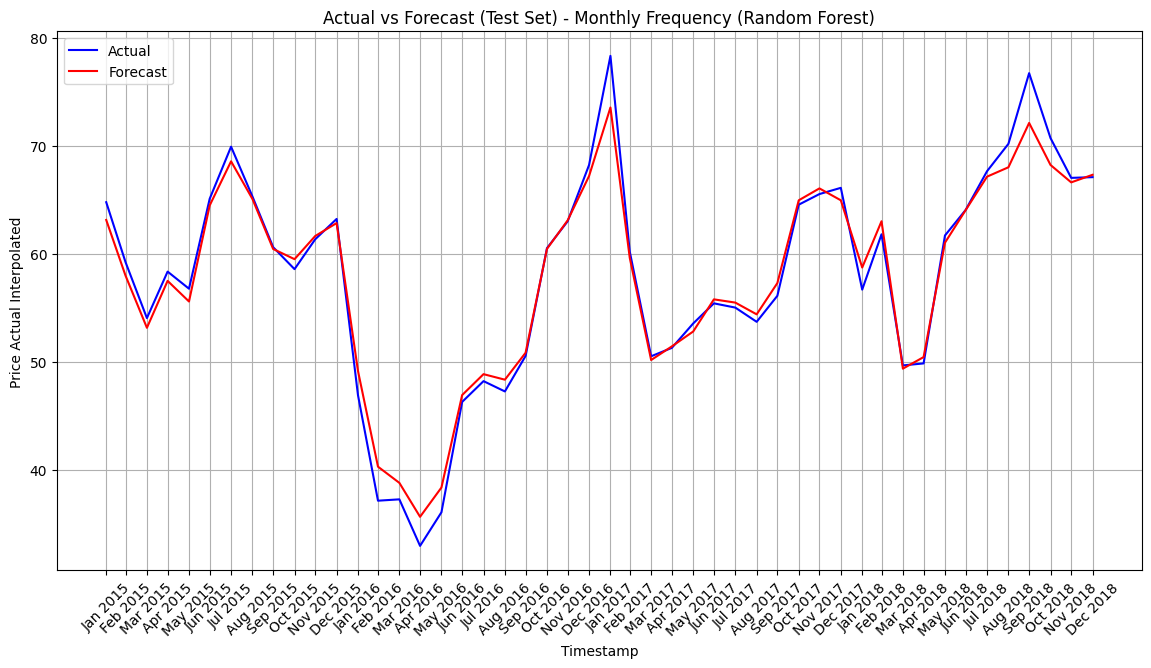

In [93]:
# Define target variable
y_price = subset_data_price['price_actual_interpolated']
timestamp_col = "time"

# Define feature set, excluding the timestamp column
X_price = subset_data_price.drop(columns=['price_actual_interpolated', timestamp_col])

# Split data into training, validation, and test sets
X_price_train, X_price_temp, y_price_train, y_price_temp = train_test_split(
    X_price, y_price, test_size=0.4, random_state=42)
X_price_val, X_price_test, y_price_val, y_price_test = train_test_split(
    X_price_temp, y_price_temp, test_size=0.5, random_state=42)

# Function to calculate adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': list(range(10, 201, 10)),  # Values from 10 to 200 with a step of 10
    'max_features': ['sqrt']  # Using square root of the number of features
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the training data
grid_search.fit(X_price_train, y_price_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_

# Predict on validation set for price
y_price_val_pred = best_rf.predict(X_price_val)

# Calculate evaluation metrics for price prediction on validation set
mae_price_val = mean_absolute_error(y_price_val, y_price_val_pred)
rmse_price_val = np.sqrt(mean_squared_error(y_price_val, y_price_val_pred))
mape_price_val = mean_absolute_percentage_error(y_price_val, y_price_val_pred)
r2_price_val = r2_score(y_price_val, y_price_val_pred)
adj_r2_price_val = adjusted_r2(r2_price_val, X_price_val.shape[0], X_price_val.shape[1])

print("\nPrice Prediction - Validation Set")
print(f"MAE: {mae_price_val}")
print(f"RMSE: {rmse_price_val}")
print(f"MAPE: {mape_price_val}")
print(f"R²: {r2_price_val}")
print(f"Adjusted R²: {adj_r2_price_val}")

# Final evaluation on test set for price prediction
y_price_test_pred = best_rf.predict(X_price_test)

mae_price_test = mean_absolute_error(y_price_test, y_price_test_pred)
rmse_price_test = np.sqrt(mean_squared_error(y_price_test, y_price_test_pred))
mape_price_test = mean_absolute_percentage_error(y_price_test, y_price_test_pred)
r2_price_test = r2_score(y_price_test, y_price_test_pred)
adj_r2_price_test = adjusted_r2(r2_price_test, X_price_test.shape[0], X_price_test.shape[1])

print("\nPrice Prediction - Test Set")
print(f"MAE: {mae_price_test}")
print(f"RMSE: {rmse_price_test}")
print(f"MAPE: {mape_price_test}")
print(f"R²: {r2_price_test}")
print(f"Adjusted R²: {adj_r2_price_test}")

# Create DataFrame for actual and predicted values
price_results_df_rf = pd.DataFrame({
    'Timestamp': subset_data_price[timestamp_col].values[X_price_test.index],
    'Actual': y_price_test,
    'Predicted': y_price_test_pred
})

# Set the timestamp as the index
price_results_df_rf.set_index('Timestamp', inplace=True)

# Add Month and Year columns for better readability
price_results_df_rf['Month'] = price_results_df_rf.index.month
price_results_df_rf['Year'] = price_results_df_rf.index.year

# Resample the data to monthly frequency and calculate the mean
price_results_monthly_rf = price_results_df_rf.resample('M').mean()

# Plot Actual vs Forecast for the test set at monthly frequency
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(price_results_monthly_rf.index, price_results_monthly_rf['Actual'], label='Actual', color='blue')

# Plot predicted values
plt.plot(price_results_monthly_rf.index, price_results_monthly_rf['Predicted'], label='Forecast', color='red')

# Add month and year labels to the x-axis
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(price_results_monthly_rf.index, rotation=45)

plt.title('Actual vs Forecast (Test Set) - Monthly Frequency (Random Forest)')
plt.xlabel('Timestamp')
plt.ylabel('Price Actual Interpolated')
plt.legend()
plt.grid(True)
plt.show()

# Linear Regression model

**1)total actual load**


Load Prediction - Validation Set
MAE: 875.6646391863155
RMSE: 1116.7585387293032
MAPE: 0.031137481462709317
R²: 0.9400501551138883
Adjusted R²: 0.9397925648322236

Load Prediction - Test Set
MAE: 895.8229098520047
RMSE: 1147.9009063570538
MAPE: 0.03201384011223728
R²: 0.9368261731378538
Adjusted R²: 0.9365547301693828


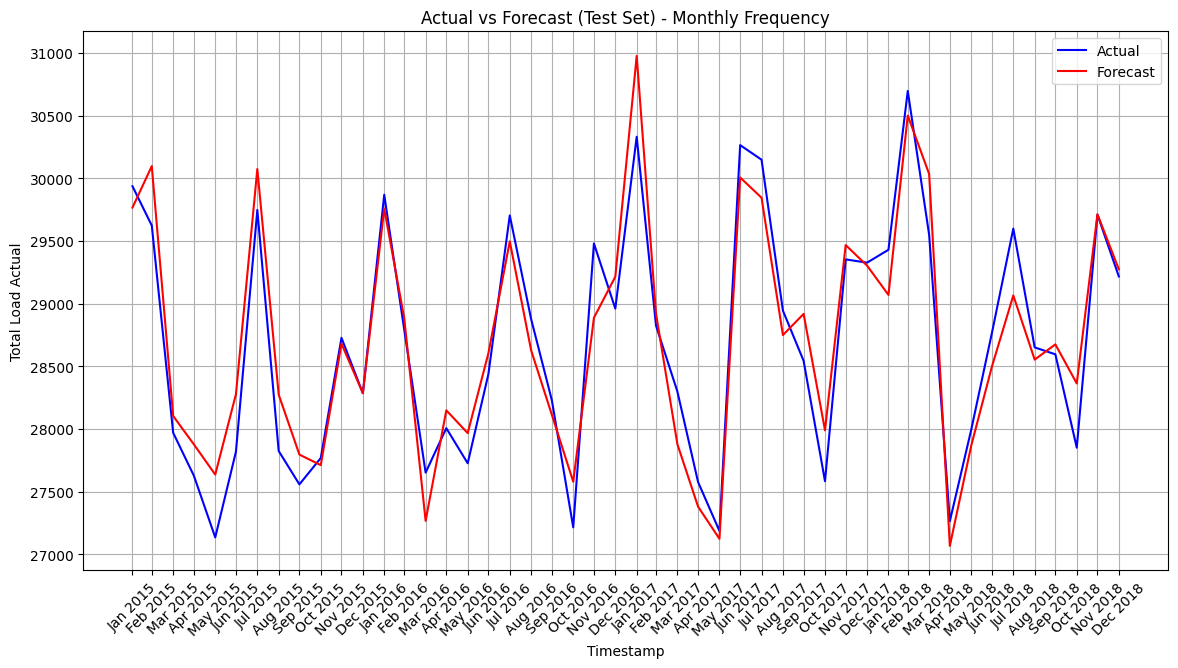

In [94]:
# Ensure 'total load actual' is the target variable
timestamp_col = 'time'  # This is your column with time information

# Define target variables
y_load = subset_data_load['total load actual']

# Define feature sets, excluding the timestamp column
X_load = subset_data_load.drop(columns=['total load actual', timestamp_col])

# Split data into training, validation, and test sets for load prediction
X_load_train, X_load_temp, y_load_train, y_load_temp, timestamps_train, timestamps_temp = train_test_split(
    X_load, y_load, subset_data_load[timestamp_col], test_size=0.4, random_state=42)
X_load_val, X_load_test, y_load_val, y_load_test, timestamps_val, timestamps_test = train_test_split(
    X_load_temp, y_load_temp, timestamps_temp, test_size=0.5, random_state=42)

# Function to calculate adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

# Linear Regression model for load prediction
model_load = LinearRegression()
model_load.fit(X_load_train, y_load_train)

# Predict on validation set for load
y_load_val_pred = model_load.predict(X_load_val)

# Calculate evaluation metrics for load prediction on validation set
mae_load_val = mean_absolute_error(y_load_val, y_load_val_pred)
rmse_load_val = np.sqrt(mean_squared_error(y_load_val, y_load_val_pred))
mape_load_val = mean_absolute_percentage_error(y_load_val, y_load_val_pred)
r2_load_val = r2_score(y_load_val, y_load_val_pred)
adj_r2_load_val = adjusted_r2(r2_load_val, X_load_val.shape[0], X_load_val.shape[1])

print("\nLoad Prediction - Validation Set")
print(f"MAE: {mae_load_val}")
print(f"RMSE: {rmse_load_val}")
print(f"MAPE: {mape_load_val}")
print(f"R²: {r2_load_val}")
print(f"Adjusted R²: {adj_r2_load_val}")

# Final evaluation on test set for load prediction
y_load_test_pred = model_load.predict(X_load_test)

mae_load_test = mean_absolute_error(y_load_test, y_load_test_pred)
rmse_load_test = np.sqrt(mean_squared_error(y_load_test, y_load_test_pred))
mape_load_test = mean_absolute_percentage_error(y_load_test, y_load_test_pred)
r2_load_test = r2_score(y_load_test, y_load_test_pred)
adj_r2_load_test = adjusted_r2(r2_load_test, X_load_test.shape[0], X_load_test.shape[1])

print("\nLoad Prediction - Test Set")
print(f"MAE: {mae_load_test}")
print(f"RMSE: {rmse_load_test}")
print(f"MAPE: {mape_load_test}")
print(f"R²: {r2_load_test}")
print(f"Adjusted R²: {adj_r2_load_test}")

# Create DataFrame for actual and predicted values
load_results_df = pd.DataFrame({
    'Timestamp': timestamps_test,
    'Actual': y_load_test,
    'Predicted': y_load_test_pred
})

# Set the timestamp as the index
load_results_df.set_index('Timestamp', inplace=True)

# Add Month and Year columns for better readability
load_results_df['Month'] = load_results_df.index.month
load_results_df['Year'] = load_results_df.index.year

# Resample the data to monthly frequency and calculate the mean
load_results_monthly = load_results_df.resample('M').mean()

# Plot Actual vs Forecast for the test set at monthly frequency
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(load_results_monthly.index, load_results_monthly['Actual'], label='Actual', color='blue')

# Plot predicted values
plt.plot(load_results_monthly.index, load_results_monthly['Predicted'], label='Forecast', color='red')

# Add month and year labels to the x-axis
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(load_results_monthly.index, rotation=45)

plt.title('Actual vs Forecast (Test Set) - Monthly Frequency')
plt.xlabel('Timestamp')
plt.ylabel('Total Load Actual')
plt.legend()
plt.grid(True)
plt.show()

**2)price actual**


Price Prediction - Validation Set
MAE: 5.455600518324747
RMSE: 6.97752025945786
MAPE: 0.11012150231757938
R²: 0.7368294700254421
Adjusted R²: 0.7360011793731616

Price Prediction - Test Set
MAE: 5.443419011314353
RMSE: 6.982929086006226
MAPE: 0.10985838374421177
R²: 0.7444304077813103
Adjusted R²: 0.7436260399660297


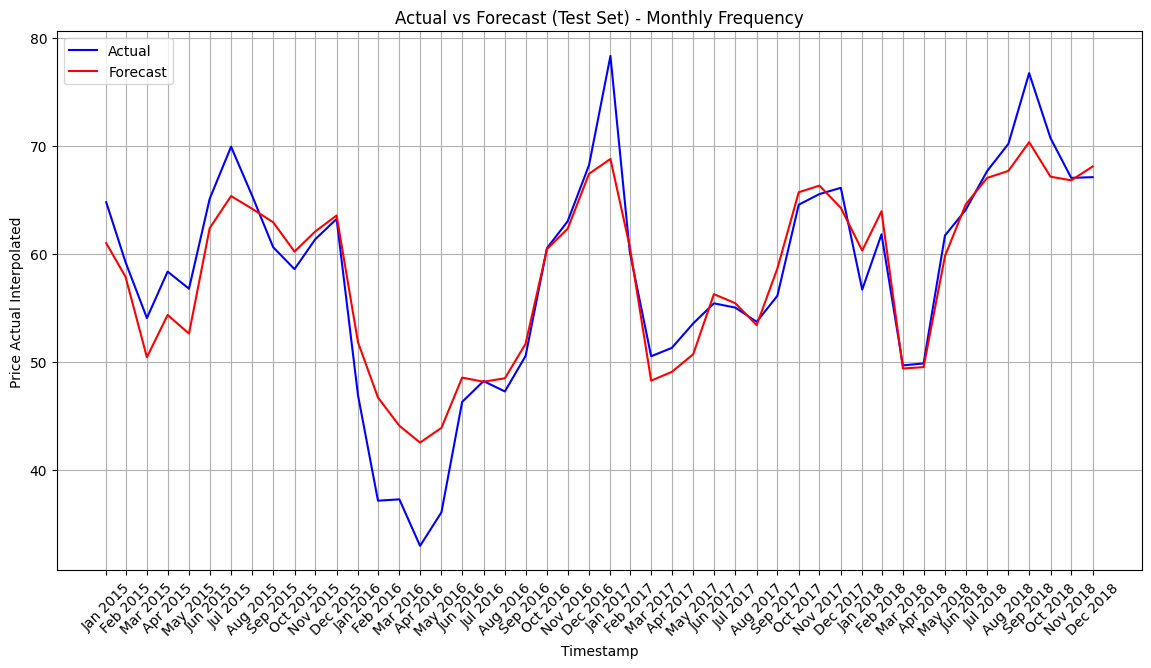

In [95]:

# Ensure 'price_actual_interpolated' is the target variable
timestamp_col = 'time'  # This is your column with time information

# Define target variables
y_price = subset_data_price['price_actual_interpolated']

# Define feature sets, excluding the timestamp column
X_price = subset_data_price.drop(columns=['price_actual_interpolated', timestamp_col])

# Split data into training, validation, and test sets for price prediction
X_price_train, X_price_temp, y_price_train, y_price_temp, timestamps_train_price, timestamps_temp_price = train_test_split(
    X_price, y_price, subset_data_price[timestamp_col], test_size=0.4, random_state=42)
X_price_val, X_price_test, y_price_val, y_price_test, timestamps_val_price, timestamps_test_price = train_test_split(
    X_price_temp, y_price_temp, timestamps_temp_price, test_size=0.5, random_state=42)

# Function to calculate adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

# Linear Regression model for price prediction
model_price = LinearRegression()
model_price.fit(X_price_train, y_price_train)

# Predict on validation set for price
y_price_val_pred = model_price.predict(X_price_val)

# Calculate evaluation metrics for price prediction on validation set
mae_price_val = mean_absolute_error(y_price_val, y_price_val_pred)
rmse_price_val = np.sqrt(mean_squared_error(y_price_val, y_price_val_pred))
mape_price_val = mean_absolute_percentage_error(y_price_val, y_price_val_pred)
r2_price_val = r2_score(y_price_val, y_price_val_pred)
adj_r2_price_val = adjusted_r2(r2_price_val, X_price_val.shape[0], X_price_val.shape[1])

print("\nPrice Prediction - Validation Set")
print(f"MAE: {mae_price_val}")
print(f"RMSE: {rmse_price_val}")
print(f"MAPE: {mape_price_val}")
print(f"R²: {r2_price_val}")
print(f"Adjusted R²: {adj_r2_price_val}")

# Final evaluation on test set for price prediction
y_price_test_pred = model_price.predict(X_price_test)

mae_price_test = mean_absolute_error(y_price_test, y_price_test_pred)
rmse_price_test = np.sqrt(mean_squared_error(y_price_test, y_price_test_pred))
mape_price_test = mean_absolute_percentage_error(y_price_test, y_price_test_pred)
r2_price_test = r2_score(y_price_test, y_price_test_pred)
adj_r2_price_test = adjusted_r2(r2_price_test, X_price_test.shape[0], X_price_test.shape[1])

print("\nPrice Prediction - Test Set")
print(f"MAE: {mae_price_test}")
print(f"RMSE: {rmse_price_test}")
print(f"MAPE: {mape_price_test}")
print(f"R²: {r2_price_test}")
print(f"Adjusted R²: {adj_r2_price_test}")

# Create DataFrame for actual and predicted values
price_results_df = pd.DataFrame({
    'Timestamp': timestamps_test_price,
    'Actual': y_price_test,
    'Predicted': y_price_test_pred
})

# Set the timestamp as the index
price_results_df.set_index('Timestamp', inplace=True)

# Add Month and Year columns for better readability
price_results_df['Month'] = price_results_df.index.month
price_results_df['Year'] = price_results_df.index.year

# Resample the data to monthly frequency and calculate the mean
price_results_monthly = price_results_df.resample('M').mean()

# Plot Actual vs Forecast for the test set at monthly frequency
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(price_results_monthly.index, price_results_monthly['Actual'], label='Actual', color='blue')

# Plot predicted values
plt.plot(price_results_monthly.index, price_results_monthly['Predicted'], label='Forecast', color='red')

# Add month and year labels to the x-axis
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(price_results_monthly.index, rotation=45)

plt.title('Actual vs Forecast (Test Set) - Monthly Frequency')
plt.xlabel('Timestamp')
plt.ylabel('Price Actual Interpolated')
plt.legend()
plt.grid(True)
plt.show()

# Gradient descent

**1)total actual load**


Load Prediction - Validation Set
MAE: 895.9467381352135
RMSE: 1128.2374667341514
MAPE: 0.031723433175411514
R²: 0.938811397306093
Adjusted R²: 0.9385484843755835

Load Prediction - Test Set
MAE: 917.7925828311212
RMSE: 1163.0850571156222
MAPE: 0.032548881826191756
R²: 0.9351438237170935
Adjusted R²: 0.9348651520917015


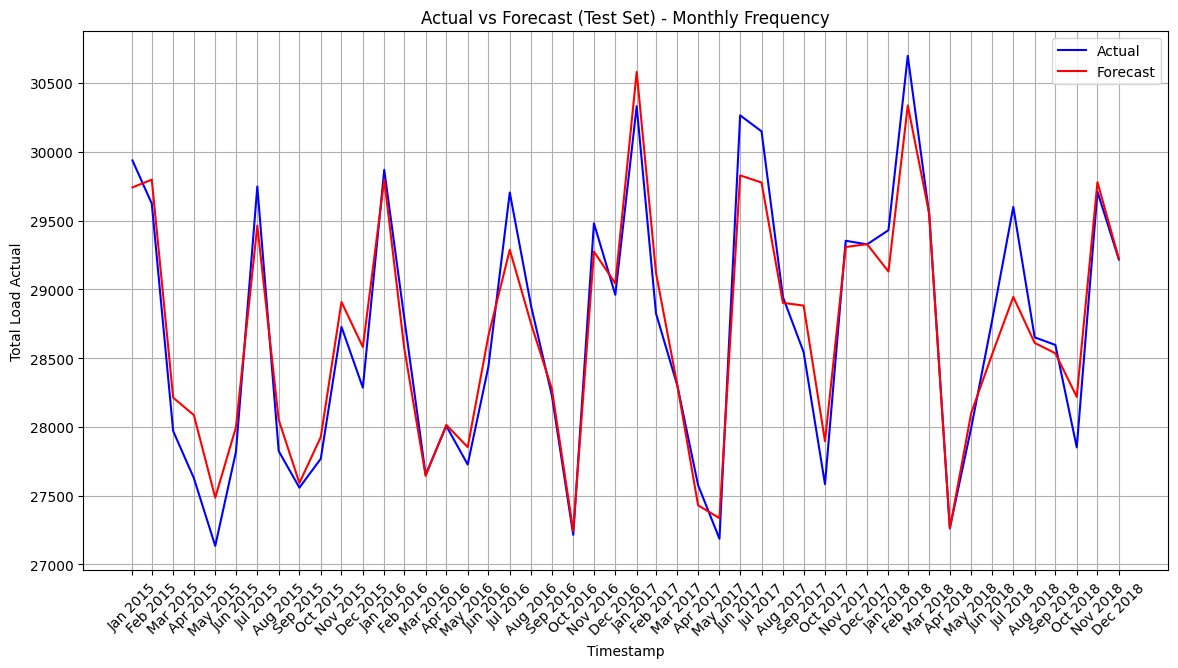

In [99]:
# Define target variable
y_load = subset_data_load['total load actual']
timestamp_col = 'time'

# Define feature set, excluding the timestamp column
X_load = subset_data_load.drop(columns=['total load actual', timestamp_col])

# Split data into training, validation, and test sets for load prediction
X_load_train, X_load_temp, y_load_train, y_load_temp, timestamps_train_load, timestamps_temp_load = train_test_split(
    X_load, y_load, subset_data_load[timestamp_col], test_size=0.4, random_state=42)
X_load_val, X_load_test, y_load_val, y_load_test, timestamps_val_load, timestamps_test_load = train_test_split(
    X_load_temp, y_load_temp, timestamps_temp_load, test_size=0.5, random_state=42)

# Function to calculate adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

# Gradient Boosting model for load prediction
model_load = GradientBoostingRegressor(random_state=42)
model_load.fit(X_load_train, y_load_train)

# Predict on validation set for load
y_load_val_pred = model_load.predict(X_load_val)

# Calculate evaluation metrics for load prediction on validation set
mae_load_val = mean_absolute_error(y_load_val, y_load_val_pred)
rmse_load_val = np.sqrt(mean_squared_error(y_load_val, y_load_val_pred))
mape_load_val = mean_absolute_percentage_error(y_load_val, y_load_val_pred)
r2_load_val = r2_score(y_load_val, y_load_val_pred)
adj_r2_load_val = adjusted_r2(r2_load_val, X_load_val.shape[0], X_load_val.shape[1])

print("\nLoad Prediction - Validation Set")
print(f"MAE: {mae_load_val}")
print(f"RMSE: {rmse_load_val}")
print(f"MAPE: {mape_load_val}")
print(f"R²: {r2_load_val}")
print(f"Adjusted R²: {adj_r2_load_val}")

# Final evaluation on test set for load prediction
y_load_test_pred = model_load.predict(X_load_test)

mae_load_test = mean_absolute_error(y_load_test, y_load_test_pred)
rmse_load_test = np.sqrt(mean_squared_error(y_load_test, y_load_test_pred))
mape_load_test = mean_absolute_percentage_error(y_load_test, y_load_test_pred)
r2_load_test = r2_score(y_load_test, y_load_test_pred)
adj_r2_load_test = adjusted_r2(r2_load_test, X_load_test.shape[0], X_load_test.shape[1])

print("\nLoad Prediction - Test Set")
print(f"MAE: {mae_load_test}")
print(f"RMSE: {rmse_load_test}")
print(f"MAPE: {mape_load_test}")
print(f"R²: {r2_load_test}")
print(f"Adjusted R²: {adj_r2_load_test}")

# Create DataFrame for actual and predicted values
load_results_df_gd = pd.DataFrame({
    'Timestamp': timestamps_test_load,
    'Actual': y_load_test,
    'Predicted': y_load_test_pred
})

# Set the timestamp as the index
load_results_df_gd.set_index('Timestamp', inplace=True)

# Add Month and Year columns for better readability
load_results_df_gd['Month'] = load_results_df_gd.index.month
load_results_df_gd['Year'] = load_results_df_gd.index.year

# Resample the data to monthly frequency and calculate the mean
load_results_monthly_gd = load_results_df_gd.resample('M').mean()

# Plot Actual vs Forecast for the test set at monthly frequency
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(load_results_monthly_gd.index, load_results_monthly_gd['Actual'], label='Actual', color='blue')

# Plot predicted values
plt.plot(load_results_monthly_gd.index, load_results_monthly_gd['Predicted'], label='Forecast', color='red')

# Format x-axis to show Month and Year
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(load_results_monthly_gd.index,rotation=45)

plt.title('Actual vs Forecast (Test Set) - Monthly Frequency')
plt.xlabel('Timestamp')
plt.ylabel('Total Load Actual')
plt.legend()
plt.grid(True)
plt.show()

**hyper parameter tuning for total load actual**

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters:  {'learning_rate': 0.3, 'n_estimators': 300}
Best Score:  -711507.339185754

Load Prediction - Validation Set
MAE: 630.6083953060357
RMSE: 809.220788618111
MAPE: 0.02239540115064987
R²: 0.9685222586525103
Adjusted R²: 0.9683870062548556

Load Prediction - Test Set
MAE: 637.2377243886674
RMSE: 824.2911085409057
MAPE: 0.022671490585850985
R²: 0.967424610390786
Adjusted R²: 0.967284641658578


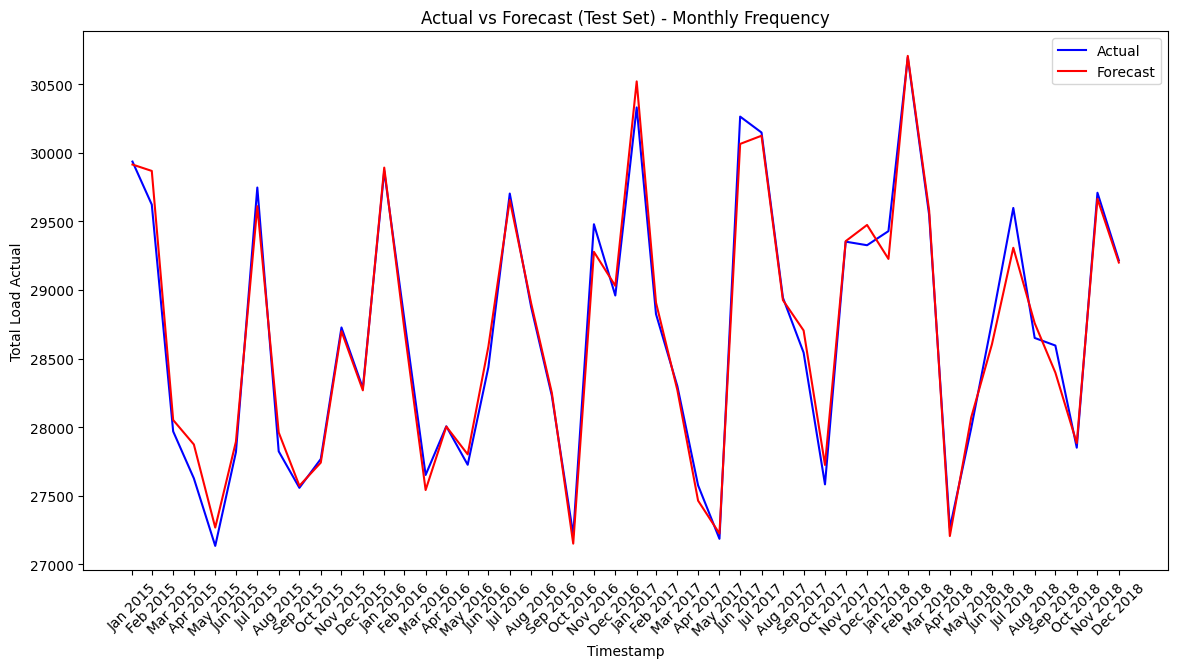

In [100]:
# Define target variable
y_load = subset_data_load['total load actual']
timestamp_col = 'time' 

# Define feature set, excluding the timestamp column
X_load = subset_data_load.drop(columns=['total load actual', timestamp_col])

# Split data into training, validation, and test sets for load prediction
X_load_train, X_load_temp, y_load_train, y_load_temp, timestamps_train_load, timestamps_temp_load = train_test_split(
    X_load, y_load, subset_data_load[timestamp_col], test_size=0.4, random_state=42)
X_load_val, X_load_test, y_load_val, y_load_test, timestamps_val_load, timestamps_test_load = train_test_split(
    X_load_temp, y_load_temp, timestamps_temp_load, test_size=0.5, random_state=42)

# Function to calculate adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300], 
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
}

# Initialize the Gradient Boosting model
gbr = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the training data
grid_search.fit(X_load_train, y_load_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Use the best estimator to make predictions
best_gbr = grid_search.best_estimator_

# Predict on validation set for load
y_load_val_pred = best_gbr.predict(X_load_val)

# Calculate evaluation metrics for load prediction on validation set
mae_load_val = mean_absolute_error(y_load_val, y_load_val_pred)
rmse_load_val = np.sqrt(mean_squared_error(y_load_val, y_load_val_pred))
mape_load_val = mean_absolute_percentage_error(y_load_val, y_load_val_pred)
r2_load_val = r2_score(y_load_val, y_load_val_pred)
adj_r2_load_val = adjusted_r2(r2_load_val, X_load_val.shape[0], X_load_val.shape[1])

print("\nLoad Prediction - Validation Set")
print(f"MAE: {mae_load_val}")
print(f"RMSE: {rmse_load_val}")
print(f"MAPE: {mape_load_val}")
print(f"R²: {r2_load_val}")
print(f"Adjusted R²: {adj_r2_load_val}")

# Final evaluation on test set for load prediction
y_load_test_pred = best_gbr.predict(X_load_test)

mae_load_test = mean_absolute_error(y_load_test, y_load_test_pred)
rmse_load_test = np.sqrt(mean_squared_error(y_load_test, y_load_test_pred))
mape_load_test = mean_absolute_percentage_error(y_load_test, y_load_test_pred)
r2_load_test = r2_score(y_load_test, y_load_test_pred)
adj_r2_load_test = adjusted_r2(r2_load_test, X_load_test.shape[0], X_load_test.shape[1])

print("\nLoad Prediction - Test Set")
print(f"MAE: {mae_load_test}")
print(f"RMSE: {rmse_load_test}")
print(f"MAPE: {mape_load_test}")
print(f"R²: {r2_load_test}")
print(f"Adjusted R²: {adj_r2_load_test}")

# Create DataFrame for actual and predicted values
load_results_df = pd.DataFrame({
    'Timestamp': timestamps_test_load,
    'Actual': y_load_test,
    'Predicted': y_load_test_pred
})

# Set the timestamp as the index
load_results_df.set_index('Timestamp', inplace=True)


# Resample the data to monthly frequency and calculate the mean
load_results_monthly = load_results_df.resample('M').mean()

# Plot Actual vs Forecast for the test set at monthly frequency
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(load_results_monthly.index, load_results_monthly['Actual'], label='Actual', color='blue')

# Plot predicted values
plt.plot(load_results_monthly.index, load_results_monthly['Predicted'], label='Forecast', color='red')

# Format x-axis to show Month and Year
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(load_results_monthly.index, rotation=45)

plt.title('Actual vs Forecast (Test Set) - Monthly Frequency')
plt.xlabel('Timestamp')
plt.ylabel('Total Load Actual')
plt.legend()
plt.grid(True)
plt.show()


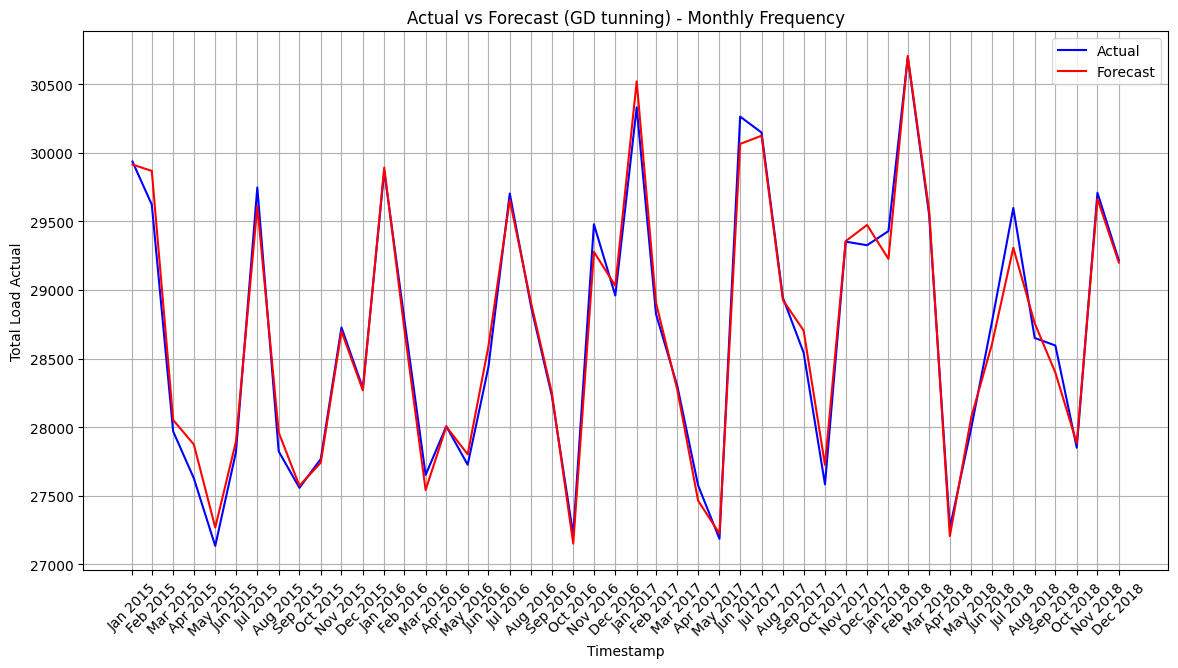

In [103]:

# Create DataFrame for actual and predicted values
load_results_df = pd.DataFrame({
    'Timestamp': timestamps_test_load,
    'Actual': y_load_test,
    'Predicted': y_load_test_pred
})

# Set the timestamp as the index
load_results_df.set_index('Timestamp', inplace=True)


# Resample the data to monthly frequency and calculate the mean
load_results_monthly = load_results_df.resample('M').mean()

# Plot Actual vs Forecast for the test set at monthly frequency
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(load_results_monthly.index, load_results_monthly['Actual'], label='Actual', color='blue')

# Plot predicted values
plt.plot(load_results_monthly.index, load_results_monthly['Predicted'], label='Forecast', color='red')

# Format x-axis to show Month and Year
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(load_results_monthly.index, rotation=45)

plt.title('Actual vs Forecast (GD tunning) - Monthly Frequency')
plt.xlabel('Timestamp')
plt.ylabel('Total Load Actual')
plt.legend()
plt.grid(True)
plt.show()


**2) price actual**


Price Prediction - Validation Set (Gradient Boosting)
MAE: 4.60880704295808
RMSE: 5.897050003748689
MAPE: 0.09069772226832892
R²: 0.8120230219630007
Adjusted R²: 0.8114313919892076

Price Prediction - Test Set (Gradient Boosting)
MAE: 4.582510432598336
RMSE: 5.870275820707021
MAPE: 0.08975451749106467
R²: 0.8193861993088222
Adjusted R²: 0.818817743856003


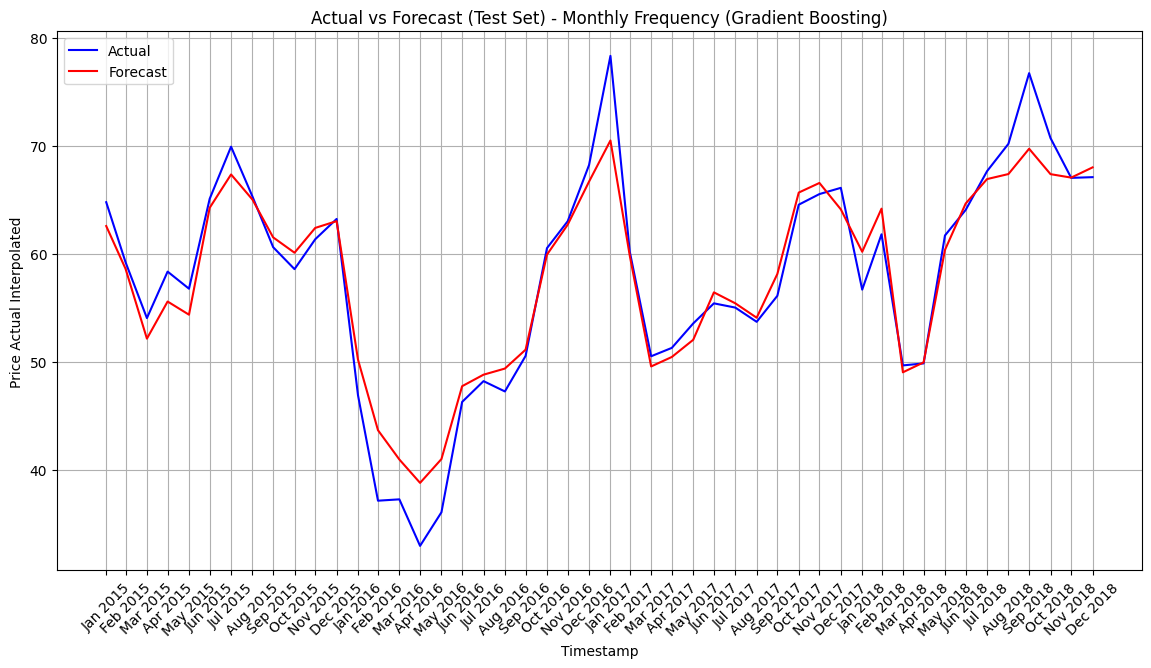

In [104]:
# Define target variable
y_price = subset_data_price['price_actual_interpolated']

# Define feature set, excluding the timestamp column
X_price = subset_data_price.drop(columns=['price_actual_interpolated', timestamp_col])

# Split data into training, validation, and test sets for price prediction
X_price_train, X_price_temp, y_price_train, y_price_temp, timestamps_train_price, timestamps_temp_price = train_test_split(
    X_price, y_price, subset_data_price[timestamp_col], test_size=0.4, random_state=42)
X_price_val, X_price_test, y_price_val, y_price_test, timestamps_val_price, timestamps_test_price = train_test_split(
    X_price_temp, y_price_temp, timestamps_temp_price, test_size=0.5, random_state=42)

# Function to calculate adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

# Gradient Boosting model for price prediction
model_price_gb = GradientBoostingRegressor(random_state=42)
model_price_gb.fit(X_price_train, y_price_train)

# Predict on validation set for price
y_price_val_pred_gb = model_price_gb.predict(X_price_val)

# Calculate evaluation metrics for price prediction on validation set
mae_price_val_gb = mean_absolute_error(y_price_val, y_price_val_pred_gb)
rmse_price_val_gb = np.sqrt(mean_squared_error(y_price_val, y_price_val_pred_gb))
mape_price_val_gb = mean_absolute_percentage_error(y_price_val, y_price_val_pred_gb)
r2_price_val_gb = r2_score(y_price_val, y_price_val_pred_gb)
adj_r2_price_val_gb = adjusted_r2(r2_price_val_gb, X_price_val.shape[0], X_price_val.shape[1])

print("\nPrice Prediction - Validation Set (Gradient Boosting)")
print(f"MAE: {mae_price_val_gb}")
print(f"RMSE: {rmse_price_val_gb}")
print(f"MAPE: {mape_price_val_gb}")
print(f"R²: {r2_price_val_gb}")
print(f"Adjusted R²: {adj_r2_price_val_gb}")

# Final evaluation on test set for price prediction
y_price_test_pred_gb = model_price_gb.predict(X_price_test)

mae_price_test_gb = mean_absolute_error(y_price_test, y_price_test_pred_gb)
rmse_price_test_gb = np.sqrt(mean_squared_error(y_price_test, y_price_test_pred_gb))
mape_price_test_gb = mean_absolute_percentage_error(y_price_test, y_price_test_pred_gb)
r2_price_test_gb = r2_score(y_price_test, y_price_test_pred_gb)
adj_r2_price_test_gb = adjusted_r2(r2_price_test_gb, X_price_test.shape[0], X_price_test.shape[1])

print("\nPrice Prediction - Test Set (Gradient Boosting)")
print(f"MAE: {mae_price_test_gb}")
print(f"RMSE: {rmse_price_test_gb}")
print(f"MAPE: {mape_price_test_gb}")
print(f"R²: {r2_price_test_gb}")
print(f"Adjusted R²: {adj_r2_price_test_gb}")

# Create DataFrame for actual and predicted values
price_results_df_gb = pd.DataFrame({
    'Timestamp': timestamps_test_price,
    'Actual': y_price_test,
    'Predicted': y_price_test_pred_gb
})

# Set the timestamp as the index
price_results_df_gb.set_index('Timestamp', inplace=True)

# Resample the data to monthly frequency and calculate the mean
price_results_monthly_gb = price_results_df_gb.resample('M').mean()

# Plot Actual vs Forecast for the test set at monthly frequency
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(price_results_monthly_gb.index, price_results_monthly_gb['Actual'], label='Actual', color='blue')

# Plot predicted values
plt.plot(price_results_monthly_gb.index, price_results_monthly_gb['Predicted'], label='Forecast', color='red')


# Format x-axis to show Month and Year
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(price_results_monthly_gb.index, rotation=45)

plt.title('Actual vs Forecast (Test Set) - Monthly Frequency (Gradient Boosting)')
plt.xlabel('Timestamp')
plt.ylabel('Price Actual Interpolated')
plt.legend()
plt.grid(True)
plt.show()


**hyper parameter tuning for price actual**

In [139]:
# Define target variable
y_price = subset_data_price['price_actual_interpolated']

# Define feature set
X_price = subset_data_price.drop(columns=['price_actual_interpolated'])

# Split data into training, validation, and test sets for price prediction
X_price_train, X_price_temp, y_price_train, y_price_temp = train_test_split(X_price, y_price, test_size=0.4, random_state=42)
X_price_val, X_price_test, y_price_val, y_price_test = train_test_split(X_price_temp, y_price_temp, test_size=0.5, random_state=42)

# Function to calculate adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [ 100, 200, 300, 400, 500, 600, 700, 800, 900],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5]
}

# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the training data
grid_search.fit(X_price_train, y_price_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Use the best estimator to make predictions
best_gbr = grid_search.best_estimator_

# Predict on validation set for price
y_price_val_pred = best_gbr.predict(X_price_val)

# Calculate evaluation metrics for price prediction on validation set
mae_price_val = mean_absolute_error(y_price_val, y_price_val_pred)
rmse_price_val = np.sqrt(mean_squared_error(y_price_val, y_price_val_pred))
mape_price_val = mean_absolute_percentage_error(y_price_val, y_price_val_pred)
r2_price_val = r2_score(y_price_val, y_price_val_pred)
adj_r2_price_val = adjusted_r2(r2_price_val, X_price_val.shape[0], X_price_val.shape[1])

print("\nPrice Prediction - Validation Set")
print(f"MAE: {mae_price_val}")
print(f"RMSE: {rmse_price_val}")
print(f"MAPE: {mape_price_val}")
print(f"R²: {r2_price_val}")
print(f"Adjusted R²: {adj_r2_price_val}")

# Final evaluation on test set for price prediction
y_price_test_pred = best_gbr.predict(X_price_test)

mae_price_test = mean_absolute_error(y_price_test, y_price_test_pred)
rmse_price_test = np.sqrt(mean_squared_error(y_price_test, y_price_test_pred))
mape_price_test = mean_absolute_percentage_error(y_price_test, y_price_test_pred)
r2_price_test = r2_score(y_price_test, y_price_test_pred)
adj_r2_price_test = adjusted_r2(r2_price_test, X_price_test.shape[0], X_price_test.shape[1])

print("\nPrice Prediction - Test Set")
print(f"MAE: {mae_price_test}")
print(f"RMSE: {rmse_price_test}")
print(f"MAPE: {mape_price_test}")
print(f"R²: {r2_price_test}")
print(f"Adjusted R²: {adj_r2_price_test}")

Fitting 3 folds for each of 45 candidates, totalling 135 fits
Best Parameters:  {'learning_rate': 0.3, 'n_estimators': 900}
Best Score:  -23.262028036752326

Price Prediction - Validation Set
MAE: 3.493242868685939
RMSE: 4.561278666918157
MAPE: 0.06770173592222059
R²: 0.8875373650912034
Adjusted R²: 0.8871834054391299

Price Prediction - Test Set
MAE: 3.495789969591527
RMSE: 4.562937656003555
MAPE: 0.0672468038728285
R²: 0.8908753191191012
Adjusted R²: 0.8905318651878595


**from the above code i undersatd that the 'n_estimators': 900 is the best out put so i thought that i need to take 
    the 'n_estimators' to 1000 so we cxan check it will ive better output than this**

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters:  {'learning_rate': 0.3, 'n_estimators': 1000}
Best Score:  -23.191298833261573

Price Prediction - Validation Set
MAE: 3.468927967360198
RMSE: 4.527702981730589
MAPE: 0.06721754109588696
R²: 0.8891869518181493
Adjusted R²: 0.8888381839984068

Price Prediction - Test Set
MAE: 3.4751466653968
RMSE: 4.536531364289682
MAPE: 0.06687219385457857
R²: 0.8921347008360055
Adjusted R²: 0.8917952106240444


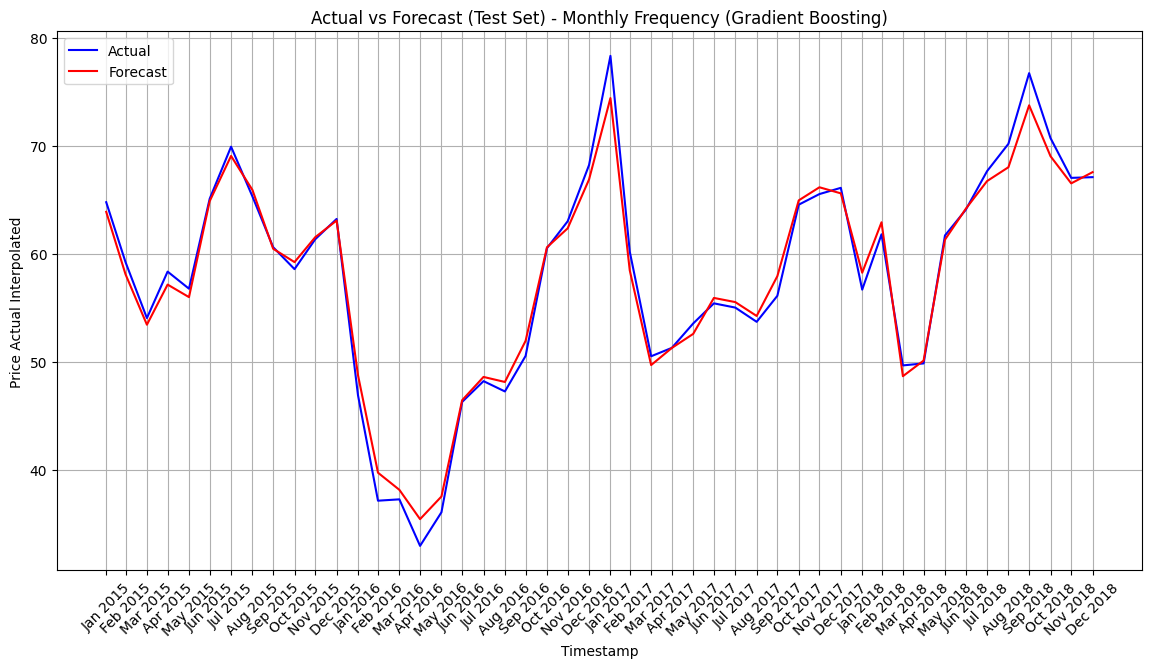

In [105]:
# Define target variable
y_price = subset_data_price['price_actual_interpolated']

# Define feature set, excluding the timestamp column
X_price = subset_data_price.drop(columns=['price_actual_interpolated', timestamp_col])

# Split data into training, validation, and test sets
X_price_train, X_price_temp, y_price_train, y_price_temp = train_test_split(
    X_price, y_price, test_size=0.4, random_state=42)
X_price_val, X_price_test, y_price_val, y_price_test = train_test_split(
    X_price_temp, y_price_temp, test_size=0.5, random_state=42)

# Function to calculate adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [850, 900, 950, 1000],
    'learning_rate': [0.1, 0.3, 0.5]
}

# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the training data
grid_search.fit(X_price_train, y_price_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Use the best estimator to make predictions
best_gbr = grid_search.best_estimator_

# Predict on validation set for price
y_price_val_pred = best_gbr.predict(X_price_val)

# Calculate evaluation metrics for price prediction on validation set
mae_price_val = mean_absolute_error(y_price_val, y_price_val_pred)
rmse_price_val = np.sqrt(mean_squared_error(y_price_val, y_price_val_pred))
mape_price_val = mean_absolute_percentage_error(y_price_val, y_price_val_pred)
r2_price_val = r2_score(y_price_val, y_price_val_pred)
adj_r2_price_val = adjusted_r2(r2_price_val, X_price_val.shape[0], X_price_val.shape[1])

print("\nPrice Prediction - Validation Set")
print(f"MAE: {mae_price_val}")
print(f"RMSE: {rmse_price_val}")
print(f"MAPE: {mape_price_val}")
print(f"R²: {r2_price_val}")
print(f"Adjusted R²: {adj_r2_price_val}")

# Final evaluation on test set for price prediction
y_price_test_pred = best_gbr.predict(X_price_test)

mae_price_test = mean_absolute_error(y_price_test, y_price_test_pred)
rmse_price_test = np.sqrt(mean_squared_error(y_price_test, y_price_test_pred))
mape_price_test = mean_absolute_percentage_error(y_price_test, y_price_test_pred)
r2_price_test = r2_score(y_price_test, y_price_test_pred)
adj_r2_price_test = adjusted_r2(r2_price_test, X_price_test.shape[0], X_price_test.shape[1])

print("\nPrice Prediction - Test Set")
print(f"MAE: {mae_price_test}")
print(f"RMSE: {rmse_price_test}")
print(f"MAPE: {mape_price_test}")
print(f"R²: {r2_price_test}")
print(f"Adjusted R²: {adj_r2_price_test}")

# Create DataFrame for actual and predicted values
price_results_df_gb = pd.DataFrame({
    'Timestamp': subset_data_price[timestamp_col].values[X_price_test.index],
    'Actual': y_price_test,
    'Predicted': y_price_test_pred
})

# Set the timestamp as the index
price_results_df_gb.set_index('Timestamp', inplace=True)

# Resample the data to monthly frequency and calculate the mean
price_results_monthly_gb = price_results_df_gb.resample('M').mean()

# Plot Actual vs Forecast for the test set at monthly frequency
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(price_results_monthly_gb.index, price_results_monthly_gb['Actual'], label='Actual', color='blue')

# Plot predicted values
plt.plot(price_results_monthly_gb.index, price_results_monthly_gb['Predicted'], label='Forecast', color='red')

# Format x-axis to show Month and Year
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(price_results_monthly_gb.index, rotation=45)

plt.title('Actual vs Forecast (Test Set) - Monthly Frequency (Gradient Boosting-Tunning)')
plt.xlabel('Timestamp')
plt.ylabel('Price Actual Interpolated')
plt.legend()
plt.grid(True)
plt.show()

# LSTM model

# 1) total load actual

In [56]:
# Ensure 'total load actual' is the target variable
target_col_load = 'total load actual'
timestamp_col = 'time'  # This is your column with time information
feature_cols_load = subset_data_load.columns.tolist()
feature_cols_load.remove(target_col_load)

# Drop the timestamp column before scaling
data_to_scale_load = subset_data_load.drop(columns=[timestamp_col])

# Preprocessing
scaler_load = MinMaxScaler()
scaled_data_load = scaler_load.fit_transform(data_to_scale_load)

# Ensure 'total load actual' is the target variable
target_index_load = data_to_scale_load.columns.get_loc(target_col_load)

# Define a function to create sequences
def create_sequences_load(data, seq_length, target_index):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length, :]
        y = data[i+seq_length, target_index]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Sequence length
SEQ_LENGTH_LOAD = 24  # Using past 24 hours to predict the next hour

# Create sequences
X_load, y_load = create_sequences_load(scaled_data_load, SEQ_LENGTH_LOAD, target_index_load)

# Split the data into train, validation, and test sets (70% train, 15% val, 15% test)
train_size_load = int(0.7 * len(X_load))
val_size_load = int(0.15 * len(X_load))

X_train_load, y_train_load = X_load[:train_size_load], y_load[:train_size_load]
X_val_load, y_val_load = X_load[train_size_load:train_size_load+val_size_load], y_load[train_size_load:train_size_load+val_size_load]
X_test_load, y_test_load = X_load[train_size_load+val_size_load:], y_load[train_size_load+val_size_load:]

# Get corresponding timestamps for the test set
timestamps_test = subset_data_load[timestamp_col].values[train_size_load+val_size_load + SEQ_LENGTH_LOAD:]

# Convert timestamps to pandas datetime format
timestamps_test = pd.to_datetime(timestamps_test)

# Define the LSTM model with additional regularization
model_load = Sequential()
model_load.add(LSTM(100, return_sequences=True, input_shape=(SEQ_LENGTH_LOAD, X_train_load.shape[2])))
model_load.add(Dropout(0.3))
model_load.add(LSTM(100, return_sequences=False))
model_load.add(Dropout(0.3))
model_load.add(Dense(1))

# Adjusting the optimizer with a smaller learning rate
optimizer_load = Adam(learning_rate=0.0001)
model_load.compile(optimizer=optimizer_load, loss='mean_squared_error')

# Train the model with a smaller batch size
history_load = model_load.fit(X_train_load, y_train_load, epochs=43, batch_size=32, validation_data=(X_val_load, y_val_load), verbose=1)

# Make predictions
y_pred_train_load = model_load.predict(X_train_load)
y_pred_val_load = model_load.predict(X_val_load)
y_pred_test_load = model_load.predict(X_test_load)

# Rescale predictions back to original scale
y_train_rescaled_load = scaler_load.inverse_transform(np.concatenate((y_train_load.reshape(-1, 1), X_train_load[:, -1, 1:]), axis=1))[:, target_index_load]
y_val_rescaled_load = scaler_load.inverse_transform(np.concatenate((y_val_load.reshape(-1, 1), X_val_load[:, -1, 1:]), axis=1))[:, target_index_load]
y_test_rescaled_load = scaler_load.inverse_transform(np.concatenate((y_test_load.reshape(-1, 1), X_test_load[:, -1, 1:]), axis=1))[:, target_index_load]

y_pred_train_rescaled_load = scaler_load.inverse_transform(np.concatenate((y_pred_train_load, X_train_load[:, -1, 1:]), axis=1))[:, target_index_load]
y_pred_val_rescaled_load = scaler_load.inverse_transform(np.concatenate((y_pred_val_load, X_val_load[:, -1, 1:]), axis=1))[:, target_index_load]
y_pred_test_rescaled_load = scaler_load.inverse_transform(np.concatenate((y_pred_test_load, X_test_load[:, -1, 1:]), axis=1))[:, target_index_load]

# Calculate R², adjusted R², MAPE, MAE, and RMSE for the test set
def adjusted_r2_load(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

n_load = len(y_test_rescaled_load)
k_load = X_test_load.shape[2]

r2_load = r2_score(y_test_rescaled_load, y_pred_test_rescaled_load)
adj_r2_load = adjusted_r2_load(r2_load, n_load, k_load)
mape_load = mean_absolute_percentage_error(y_test_rescaled_load, y_pred_test_rescaled_load)
mae_load = mean_absolute_error(y_test_rescaled_load, y_pred_test_rescaled_load)
rmse_load = np.sqrt(mean_squared_error(y_test_rescaled_load, y_pred_test_rescaled_load))

print(f'R²: {r2_load}')
print(f'Adjusted R²: {adj_r2_load}')
print(f'MAPE: {mape_load}')
print(f'MAE: {mae_load}')
print(f'RMSE: {rmse_load}')




Epoch 1/43
767/767 [==============================] - 34s 39ms/step - loss: 0.0272 - val_loss: 0.0110
Epoch 2/43
767/767 [==============================] - 36s 47ms/step - loss: 0.0116 - val_loss: 0.0073
Epoch 3/43
767/767 [==============================] - 37s 49ms/step - loss: 0.0083 - val_loss: 0.0053
Epoch 4/43
767/767 [==============================] - 37s 48ms/step - loss: 0.0066 - val_loss: 0.0040
Epoch 5/43
767/767 [==============================] - 37s 48ms/step - loss: 0.0058 - val_loss: 0.0039
Epoch 6/43
767/767 [==============================] - 37s 48ms/step - loss: 0.0053 - val_loss: 0.0032
Epoch 7/43
767/767 [==============================] - 38s 49ms/step - loss: 0.0047 - val_loss: 0.0030
Epoch 8/43
767/767 [==============================] - 38s 49ms/step - loss: 0.0043 - val_loss: 0.0029
Epoch 9/43
767/767 [==============================] - 37s 49ms/step - loss: 0.0041 - val_loss: 0.0028
Epoch 10/43
767/767 [==============================] - 38s 50ms/step - loss: 0.003

In [63]:
model_load.save("Electricity_Demand.h5")

# price actual (LSTM) model

In [64]:

# Ensure 'price_actual_interpolated' is the target variable
target_col_price = 'price_actual_interpolated'
timestamp_col_price = 'time'  # This is your column with time information
feature_cols_price = subset_data_price.columns.tolist()
feature_cols_price.remove(target_col_price)

# Drop the timestamp column before scaling
data_to_scale_price = subset_data_price.drop(columns=[timestamp_col_price])

# Preprocessing
scaler_price = MinMaxScaler()
scaled_data_price = scaler_price.fit_transform(data_to_scale_price)

# Ensure 'price_actual_interpolated' is the target variable
target_index_price = data_to_scale_price.columns.get_loc(target_col_price)

# Define a function to create sequences
def create_sequences_price(data, seq_length, target_index):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length, :]
        y = data[i+seq_length, target_index]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Sequence length
SEQ_LENGTH_PRICE = 24  # Using past 24 hours to predict the next hour

# Create sequences
X_price, y_price = create_sequences_price(scaled_data_price, SEQ_LENGTH_PRICE, target_index_price)

# Split the data into train, validation, and test sets (70% train, 15% val, 15% test)
train_size_price = int(0.7 * len(X_price))
val_size_price = int(0.15 * len(X_price))

X_train_price, y_train_price = X_price[:train_size_price], y_price[:train_size_price]
X_val_price, y_val_price = X_price[train_size_price:train_size_price+val_size_price], y_price[train_size_price:train_size_price+val_size_price]
X_test_price, y_test_price = X_price[train_size_price+val_size_price:], y_price[train_size_price+val_size_price:]

# Get corresponding timestamps for the test set
timestamps_test_price = subset_data_price[timestamp_col_price].values[train_size_price+val_size_price + SEQ_LENGTH_PRICE:]

# Convert timestamps to pandas datetime format
timestamps_test_price = pd.to_datetime(timestamps_test_price)

# Define the LSTM model with additional regularization
model_price = Sequential()
model_price.add(LSTM(100, return_sequences=True, input_shape=(SEQ_LENGTH_PRICE, X_train_price.shape[2])))
model_price.add(Dropout(0.3))
model_price.add(LSTM(100, return_sequences=False))
model_price.add(Dropout(0.3))
model_price.add(Dense(1))

# Adjusting the optimizer with a smaller learning rate
optimizer_price = Adam(learning_rate=0.0001)
model_price.compile(optimizer=optimizer_price, loss='mean_squared_error')

# Train the model with a smaller batch size
history_price = model_price.fit(X_train_price, y_train_price, epochs=40, batch_size=32, validation_data=(X_val_price, y_val_price), verbose=1)

# Make predictions
y_pred_train_price = model_price.predict(X_train_price)
y_pred_val_price = model_price.predict(X_val_price)
y_pred_test_price = model_price.predict(X_test_price)

# Rescale predictions back to original scale
y_train_rescaled_price = scaler_price.inverse_transform(np.concatenate((y_train_price.reshape(-1, 1), X_train_price[:, -1, 1:]), axis=1))[:, target_index_price]
y_val_rescaled_price = scaler_price.inverse_transform(np.concatenate((y_val_price.reshape(-1, 1), X_val_price[:, -1, 1:]), axis=1))[:, target_index_price]
y_test_rescaled_price = scaler_price.inverse_transform(np.concatenate((y_test_price.reshape(-1, 1), X_test_price[:, -1, 1:]), axis=1))[:, target_index_price]

y_pred_train_rescaled_price = scaler_price.inverse_transform(np.concatenate((y_pred_train_price, X_train_price[:, -1, 1:]), axis=1))[:, target_index_price]
y_pred_val_rescaled_price = scaler_price.inverse_transform(np.concatenate((y_pred_val_price, X_val_price[:, -1, 1:]), axis=1))[:, target_index_price]
y_pred_test_rescaled_price = scaler_price.inverse_transform(np.concatenate((y_pred_test_price, X_test_price[:, -1, 1:]), axis=1))[:, target_index_price]

# Calculate R², adjusted R², MAPE, MAE, and RMSE for the test set
def adjusted_r2_price(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

n_price = len(y_test_rescaled_price)
k_price = X_test_price.shape[2]

r2_price = r2_score(y_test_rescaled_price, y_pred_test_rescaled_price)
adj_r2_price = adjusted_r2_price(r2_price, n_price, k_price)
mape_price = mean_absolute_percentage_error(y_test_rescaled_price, y_pred_test_rescaled_price)
mae_price = mean_absolute_error(y_test_rescaled_price, y_pred_test_rescaled_price)
rmse_price = np.sqrt(mean_squared_error(y_test_rescaled_price, y_pred_test_rescaled_price))

print(f'R²: {r2_price}')
print(f'Adjusted R²: {adj_r2_price}')
print(f'MAPE: {mape_price}')
print(f'MAE: {mae_price}')
print(f'RMSE: {rmse_price}')


Epoch 1/40
767/767 [==============================] - 78s 89ms/step - loss: 0.0189 - val_loss: 0.0115
Epoch 2/40
767/767 [==============================] - 64s 83ms/step - loss: 0.0108 - val_loss: 0.0097
Epoch 3/40
767/767 [==============================] - 65s 84ms/step - loss: 0.0093 - val_loss: 0.0084
Epoch 4/40
767/767 [==============================] - 64s 83ms/step - loss: 0.0082 - val_loss: 0.0073
Epoch 5/40
767/767 [==============================] - 63s 82ms/step - loss: 0.0072 - val_loss: 0.0063
Epoch 6/40
767/767 [==============================] - 64s 84ms/step - loss: 0.0063 - val_loss: 0.0054
Epoch 7/40
767/767 [==============================] - 64s 84ms/step - loss: 0.0057 - val_loss: 0.0046
Epoch 8/40
767/767 [==============================] - 64s 83ms/step - loss: 0.0051 - val_loss: 0.0043
Epoch 9/40
767/767 [==============================] - 65s 84ms/step - loss: 0.0047 - val_loss: 0.0039
Epoch 10/40
767/767 [==============================] - 64s 83ms/step - loss: 0.004

# Final report

# 1) Total Load Actual

In [108]:
# Define the data
data = {
    'Model': [
        'Linear Regression', 'Random Forest', 'Random Forest (Tuned)', 
        'Gradient Descent', 'Gradient Descent (Tuned)', 'LSTM'
    ],
    
    'MAPE': [
        3.201, 2.517, 2.492, 
        3.254, 2.267, 1.641
    ],
    'prediction': ['total load actual', 'total load actual', 'total load actual','total load actual', 'total load actual', 'total load actual'],
    
    'Load Prediction': ['Test Set', 'Test Set', 'Test Set', 'Test Set', 'Test Set', 'Test Set'],
    'MAE': [
        895.822, 704.160, 696.885, 
        917.792, 637.237, 466.654
    ],
    'RMSE': [
        1147.900, 937.271, 926.873, 
        1163.085, 824.291, 630.310
    ],
    'MAPE': [
        3.201, 2.517, 2.492, 
        3.254, 2.267, 1.641
    ],
    'R²': [
        0.9368, 0.9578, 0.9588, 
        0.9351, 0.9674, 0.9811
    ],
    'Adjusted R²': [
        0.9365, 0.9577, 0.9586, 
        0.9348, 0.9672, 0.9810
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

#mape
#before:1.762432516565422
#after:2.1649529985790172


# Display the DataFrame with the specified heading
print("Comparison of Total Load Actual Models")
df  

Comparison of Total Load Actual Models


Model         prediction Load Prediction      MAE   
0         Linear Regression  total load actual        Test Set  895.822  \
1             Random Forest  total load actual        Test Set  704.160   
2     Random Forest (Tuned)  total load actual        Test Set  696.885   
3          Gradient Descent  total load actual        Test Set  917.792   
4  Gradient Descent (Tuned)  total load actual        Test Set  637.237   
5                      LSTM  total load actual        Test Set  466.654   

       RMSE   MAPE      R²  Adjusted R²  
0  1147.900  3.201  0.9368       0.9365  
1   937.271  2.517  0.9578       0.9577  
2   926.873  2.492  0.9588       0.9586  
3  1163.085  3.254  0.9351       0.9348  
4   824.291  2.267  0.9674       0.9672  
5   630.310  1.641  0.9811       0.9810

**"LSTM" model is given the best output to predict the total load actual**`

**In the dataset, the following types of columns were considered to predict the total load actual  :**
**Load-related Features(only target column), Generation-related features, Forecast-related features, Price-related Features, Time-related features
, Season-related features, Weather-related features**

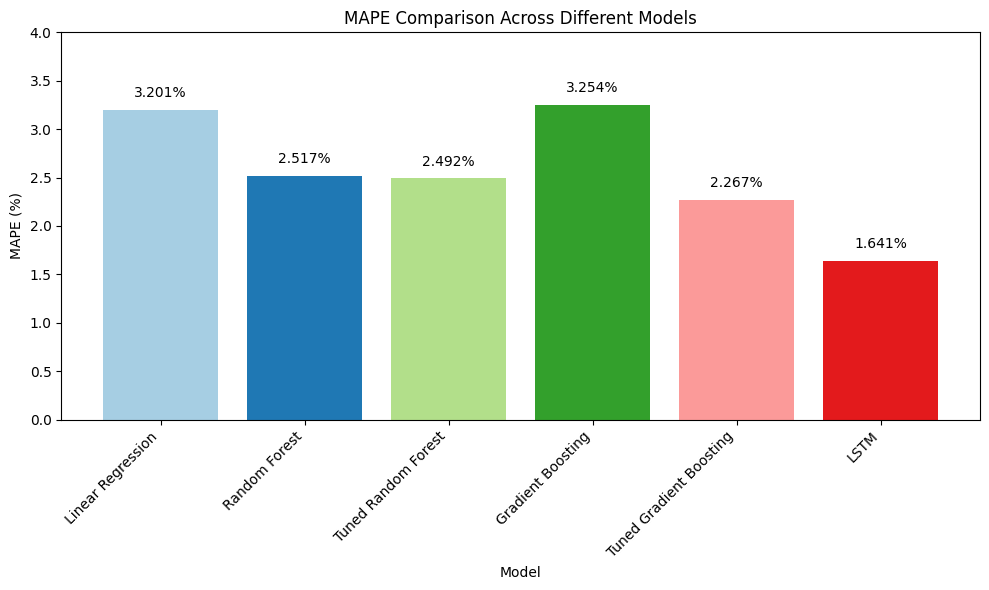

In [114]:
import matplotlib.pyplot as plt

# Example data
model_names = ['Linear Regression', 'Random Forest', 'Tuned Random Forest', 
               'Gradient Boosting', 'Tuned Gradient Boosting', 'LSTM']
mape_values =  [
        3.201, 2.517, 2.492, 
        3.254, 2.267, 1.641
    ]
# Create the bar graph with different colors
colors = plt.cm.Paired(range(len(model_names)))  # Use a colormap for different colors

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, mape_values, color=colors)

# Set y-axis limit to 4%
plt.ylim(0, 4)

# Add titles and labels
plt.title('MAPE Comparison Across Different Models')
plt.xlabel('Model')
plt.ylabel('MAPE (%)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the percentage values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"{yval:.3f}%", ha='center', va='bottom')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


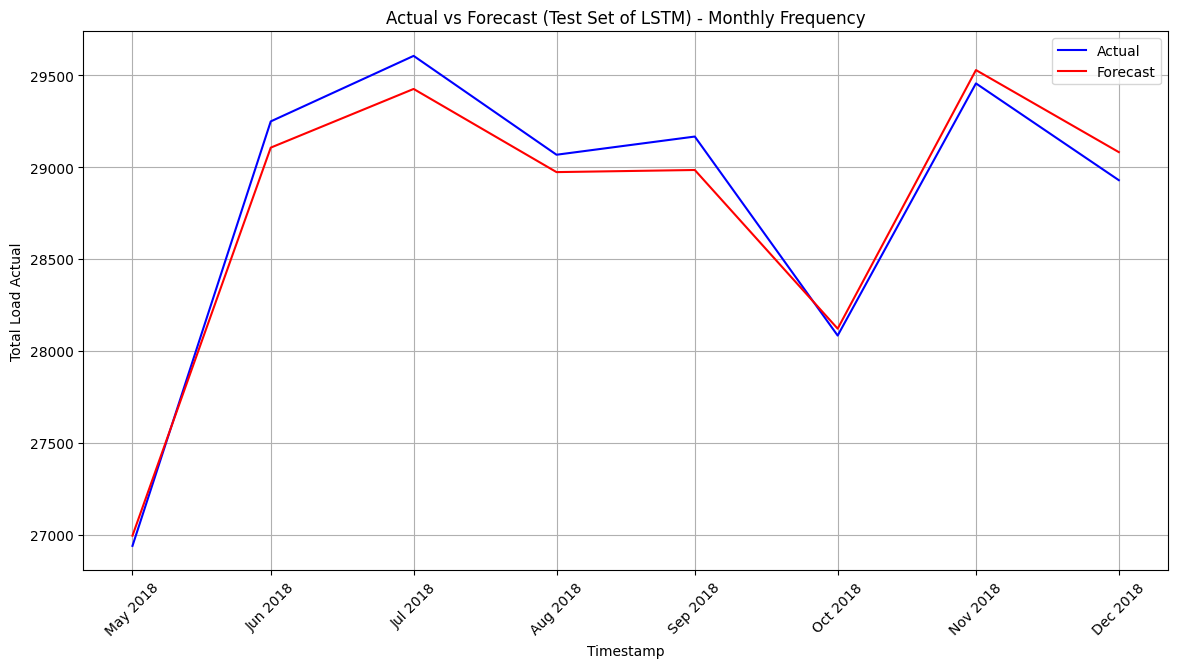

In [67]:
# Resample the complete actual data to monthly frequency and calculate the mean
complete_actual_monthly_lstm = subset_data_load.resample('M', on=timestamp_col)[target_col_load].mean()

# Create DataFrame for actual and predicted values for the test set
load_results_df_lstm = pd.DataFrame({
    'Timestamp': timestamps_test,
    'Actual': y_test_rescaled_load,
    'Predicted': y_pred_test_rescaled_load.flatten()  # Flatten the array for the DataFrame
})

# Set the timestamp as the index
load_results_df_lstm.set_index('Timestamp', inplace=True)

# Resample to monthly frequency and calculate the mean
load_results_monthly_lstm = load_results_df_lstm.resample('M').mean()

# Plot Actual vs Forecast for the test set at monthly frequency
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(load_results_monthly_lstm.index, load_results_monthly_lstm['Actual'], label='Actual', color='blue')

# Plot predicted values
plt.plot(load_results_monthly_lstm.index, load_results_monthly_lstm['Predicted'], label='Forecast', color='red')

# Set the x-axis ticks to display each month with the format "Month Year"
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))

# Generate monthly ticks for the x-axis
plt.xticks(pd.date_range(start=load_results_monthly_lstm.index.min(), end=load_results_monthly_lstm.index.max(), freq='M'), rotation=45)

plt.title('Actual vs Forecast (Test Set of LSTM) - Monthly Frequency')
plt.xlabel('Timestamp')
plt.ylabel('Total Load Actual')
plt.legend()
plt.grid(True)
plt.show()

**above graph for actual vs predicted only for test data**

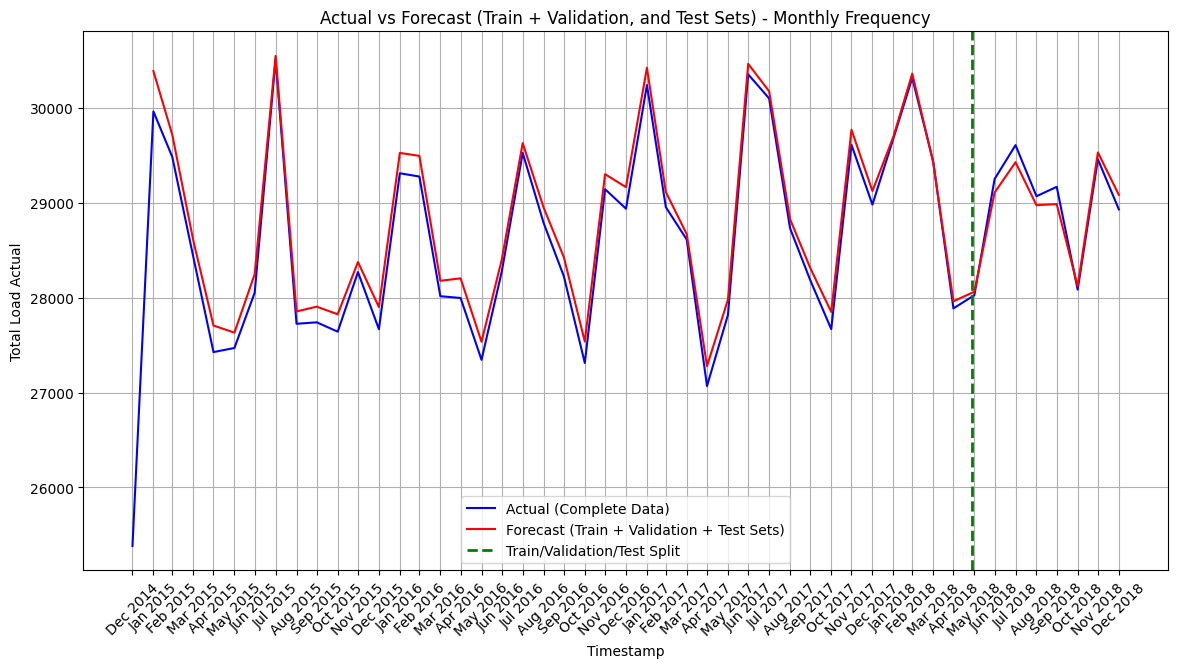

In [80]:
# Combine predictions for train, validation, and test sets
combined_y_pred_rescaled_load = np.concatenate((y_pred_train_rescaled_load, y_pred_val_rescaled_load, y_pred_test_rescaled_load))

# Combine actual values for train, validation, and test sets
combined_y_actual_rescaled_load = np.concatenate((y_train_rescaled_load, y_val_rescaled_load, y_test_rescaled_load))

# Get corresponding timestamps for the combined train, validation, and test sets
timestamps_combined = subset_data_load[timestamp_col].values[SEQ_LENGTH_LOAD:train_size_load + val_size_load + len(X_test_load) + SEQ_LENGTH_LOAD]

# Convert timestamps to pandas datetime format
timestamps_combined = pd.to_datetime(timestamps_combined)

# Create DataFrame for actual and predicted values for the combined set
load_results_df_combined = pd.DataFrame({
    'Timestamp': timestamps_combined,
    'Actual': combined_y_actual_rescaled_load,
    'Predicted': combined_y_pred_rescaled_load.flatten()  # Flatten the array for the DataFrame
})

# Set the timestamp as the index
load_results_df_combined.set_index('Timestamp', inplace=True)

# Resample to monthly frequency and calculate the mean for the combined set
load_results_monthly_combined = load_results_df_combined.resample('M').mean()

# Resample the complete actual data to monthly frequency and calculate the mean
complete_actual_monthly_lstm = subset_data_load.resample('M', on=timestamp_col)[target_col_load].mean()

# Plot Actual vs Forecast for the combined set at monthly frequency
plt.figure(figsize=(14, 7))

# Plot actual values for the complete data
plt.plot(complete_actual_monthly_lstm.index, complete_actual_monthly_lstm, label='Actual (Complete Data)', color='blue')

# Plot predicted values for the combined set
plt.plot(load_results_monthly_combined.index, load_results_monthly_combined['Predicted'], label='Forecast (Train + Validation + Test Sets)', color='red')

# Set the x-axis ticks to display each month with the format "Month Year"
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))

# Generate monthly ticks for the x-axis
plt.xticks(pd.date_range(start=complete_actual_monthly_lstm.index.min(), end=complete_actual_monthly_lstm.index.max(), freq='M'), rotation=45)

# Add vertical line to indicate the split between training/validation and test data
plt.axvline(x=subset_data_load[timestamp_col].values[train_size_load + val_size_load + SEQ_LENGTH_LOAD], color='green', linestyle='--', linewidth=2, label='Train/Validation/Test Split')

plt.title('Actual vs Forecast (Train + Validation, and Test Sets) - Monthly Frequency')
plt.xlabel('Timestamp')
plt.ylabel('Total Load Actual')
plt.legend()
plt.grid(True)
plt.show()

# 2) price actual

In [115]:
# Define the data
data2 = {
    'Model': [
        'Linear Regression', 'Random Forest', 'Random Forest (Tuned)', 
        'Gradient Descent', 'Gradient Descent (Tuned)', 'LSTM'
    ],
    
    'prediction': ['price actual', 'price actual', 'price actual', 'price actual', 'price actual', 'price actual'],
    
    'Price Prediction': ['Test Set', 'Test Set', 'Test Set', 'Test Set', 'Test Set', 'Test Set'],
    'MAE': [
        5.4434, 3.0540, 2.9729, 
        4.5825, 3.4751, 1.8525
    ],
    'RMSE': [
        6.9829, 4.1627, 4.000, 
        5.870, 4.536, 2.389
    ],
    'MAPE': [
        10.985, 5.816, 5.760, 
        8.975, 6.687, 2.666
    ],
    'R²': [
        0.7444, 0.9091, 0.9161, 
        0.8193, 0.8921, 0.9086
    ],
    'Adjusted R²': [
        0.7436, 0.9088, 0.9158, 
        0.8188, 0.8917, 0.9082
    ]
}

# Create the DataFrame
df2 = pd.DataFrame(data2)

# Display the DataFrame with the specified heading
print("Comparison of Price Prediction Models")
df2 




Comparison of Price Prediction Models


Model    prediction Price Prediction     MAE    RMSE   
0         Linear Regression  price actual         Test Set  5.4434  6.9829  \
1             Random Forest  price actual         Test Set  3.0540  4.1627   
2     Random Forest (Tuned)  price actual         Test Set  2.9729  4.0000   
3          Gradient Descent  price actual         Test Set  4.5825  5.8700   
4  Gradient Descent (Tuned)  price actual         Test Set  3.4751  4.5360   
5                      LSTM  price actual         Test Set  1.8525  2.3890   

     MAPE      R²  Adjusted R²  
0  10.985  0.7444       0.7436  
1   5.816  0.9091       0.9088  
2   5.760  0.9161       0.9158  
3   8.975  0.8193       0.8188  
4   6.687  0.8921       0.8917  
5   2.666  0.9086       0.9082

**"LSTM" model is best for price actual**

**In the dataset, the following types of columns were considered to predict the price   :**
**Price-related features(only target column, Generation-related features, Forecast-related features, Load-related features, Time-related features
, Season-related features, Month-related features, Weather-related features**

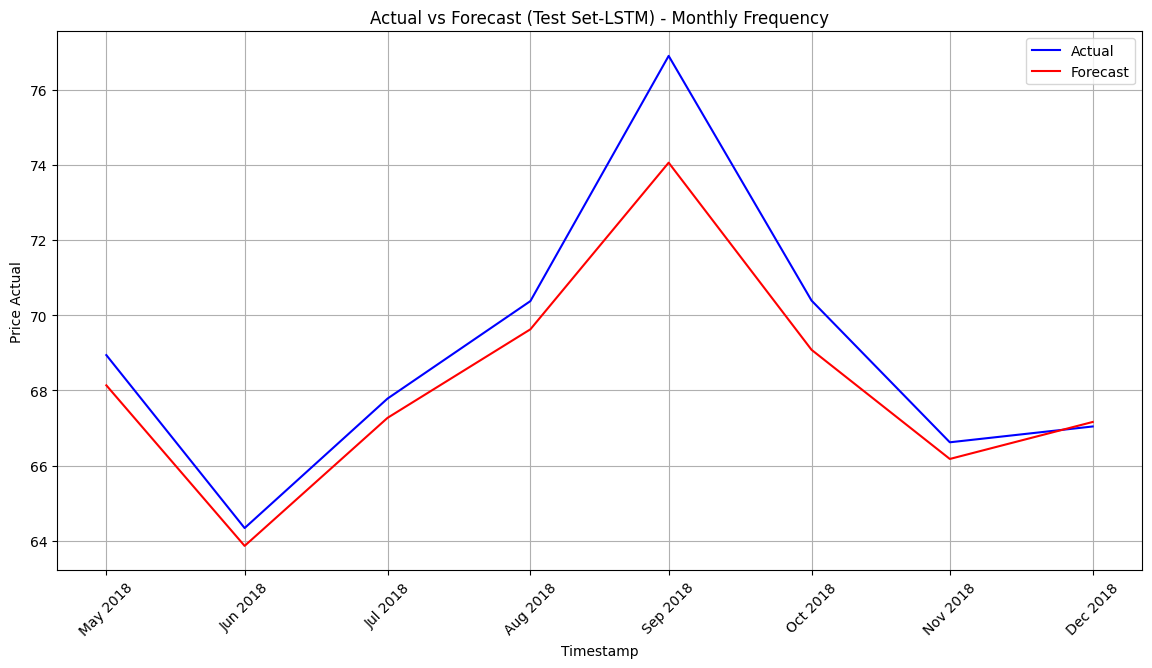

In [71]:
complete_price_monthly_lstm = subset_data_price.resample('M', on=timestamp_col)[target_col_price].mean()

# Create DataFrame for actual and predicted values for the test set
price_results_df = pd.DataFrame({
    'Timestamp': timestamps_test_price,
    'Actual': y_test_rescaled_price,
    'Predicted': y_pred_test_rescaled_price.flatten()  # Flatten the array for the DataFrame
})

# Set the timestamp as the index
price_results_df.set_index('Timestamp', inplace=True)

# Resample to monthly frequency and calculate the mean for the test set
price_results_monthly = price_results_df.resample('M').mean()

# Plot Actual vs Forecast for the test set at monthly frequency
plt.figure(figsize=(14, 7))

# Plot actual values for the test data
plt.plot(price_results_monthly.index, price_results_monthly['Actual'], label='Actual', color='blue')

# Plot predicted values for the test set
plt.plot(price_results_monthly.index, price_results_monthly['Predicted'], label='Forecast', color='red')

# Set the x-axis ticks to display each month with the format "Month Year"
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))

# Generate monthly ticks for the x-axis
plt.xticks(pd.date_range(start=price_results_monthly.index.min(), end=price_results_monthly.index.max(), freq='M'), rotation=45)

plt.title('Actual vs Forecast (Test Set-LSTM) - Monthly Frequency')
plt.xlabel('Timestamp')
plt.ylabel('Price Actual')
plt.legend()
plt.grid(True)
plt.show()

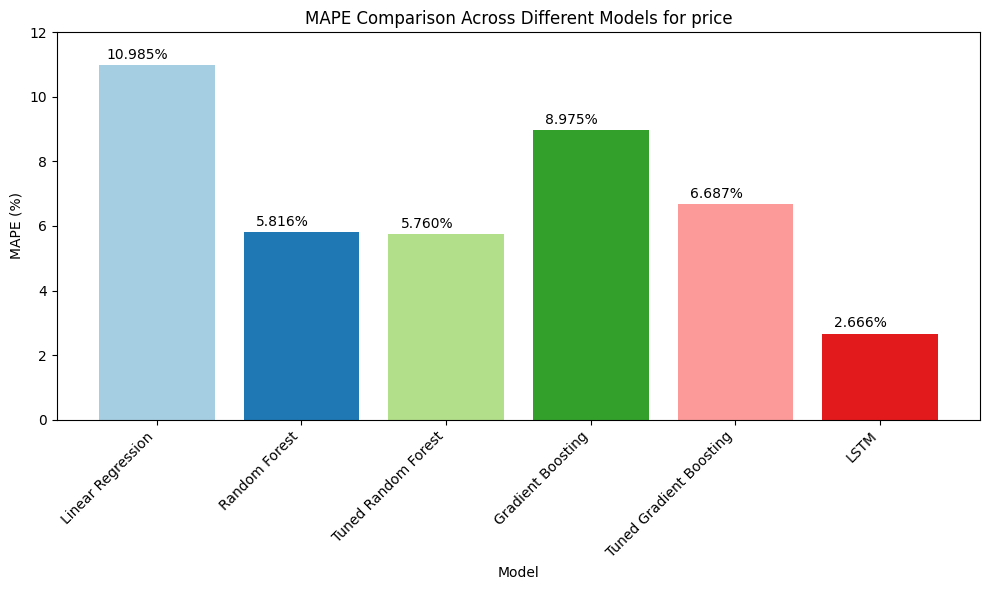

In [119]:
import matplotlib.pyplot as plt

# Example data
model_names = ['Linear Regression', 'Random Forest', 'Tuned Random Forest', 
               'Gradient Boosting', 'Tuned Gradient Boosting', 'LSTM']
mape_values =  [
        10.985, 5.816, 5.760, 
        8.975, 6.687, 2.666
    ]
# Create the bar graph with different colors
colors = plt.cm.Paired(range(len(model_names)))  # Use a colormap for different colors

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, mape_values, color=colors)

# Set y-axis limit to 4%
plt.ylim(0, 12)

# Add titles and labels
plt.title('MAPE Comparison Across Different Models for price')
plt.xlabel('Model')
plt.ylabel('MAPE (%)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the percentage values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3, yval + 0.1, f"{yval:.3f}%", ha='center', va='bottom')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


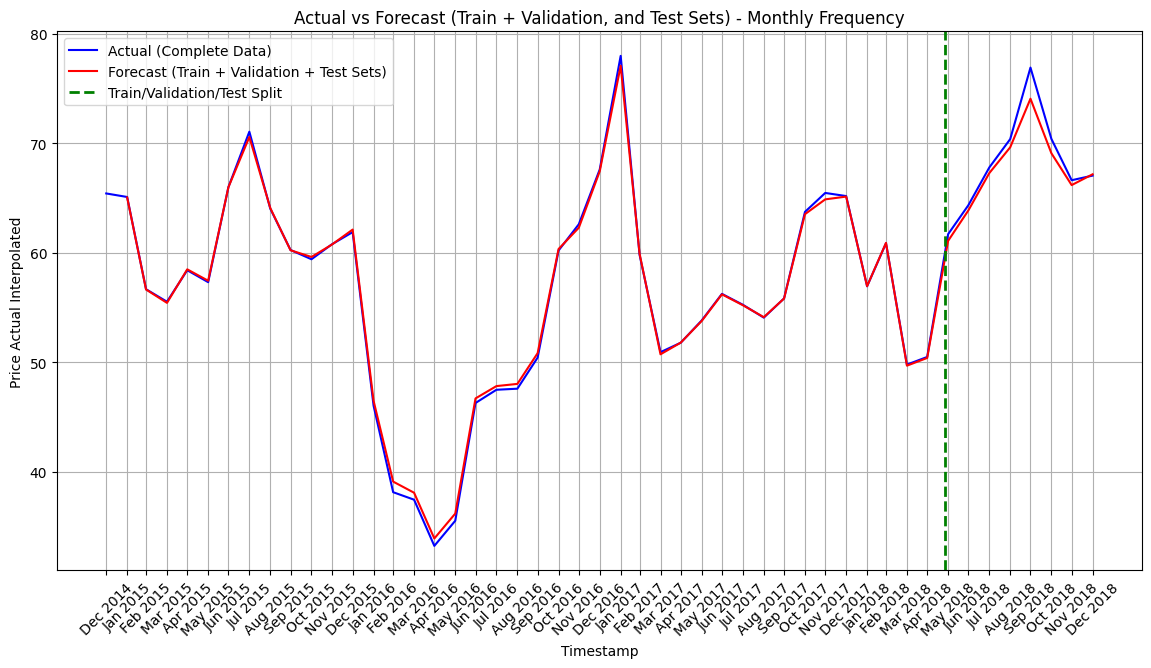

In [79]:
# Combine predictions for train, validation, and test sets
combined_y_pred_rescaled_price = np.concatenate((y_pred_train_rescaled_price, y_pred_val_rescaled_price, y_pred_test_rescaled_price))

# Combine actual values for train, validation, and test sets
combined_y_actual_rescaled_price = np.concatenate((y_train_rescaled_price, y_val_rescaled_price, y_test_rescaled_price))

# Get corresponding timestamps for the combined train, validation, and test sets
timestamps_combined_price = subset_data_price[timestamp_col_price].values[SEQ_LENGTH_PRICE:train_size_price + val_size_price + len(X_test_price) + SEQ_LENGTH_PRICE]

# Convert timestamps to pandas datetime format
timestamps_combined_price = pd.to_datetime(timestamps_combined_price)

# Create DataFrame for actual and predicted values for the combined set
price_results_df_combined = pd.DataFrame({
    'Timestamp': timestamps_combined_price,
    'Actual': combined_y_actual_rescaled_price,
    'Predicted': combined_y_pred_rescaled_price.flatten()  # Flatten the array for the DataFrame
})

# Set the timestamp as the index
price_results_df_combined.set_index('Timestamp', inplace=True)

# Resample to monthly frequency and calculate the mean for the combined set
price_results_monthly_combined = price_results_df_combined.resample('M').mean()

# Resample the complete actual data to monthly frequency and calculate the mean
complete_actual_monthly_lstm_price = subset_data_price.resample('M', on=timestamp_col_price)[target_col_price].mean()

# Plot Actual vs Forecast for the combined set at monthly frequency
plt.figure(figsize=(14, 7))

# Plot actual values for the complete data
plt.plot(complete_actual_monthly_lstm_price.index, complete_actual_monthly_lstm_price, label='Actual (Complete Data)', color='blue')

# Plot predicted values for the combined set
plt.plot(price_results_monthly_combined.index, price_results_monthly_combined['Predicted'], label='Forecast (Train + Validation + Test Sets)', color='red')

# Set the x-axis ticks to display each month with the format "Month Year"
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))

# Generate monthly ticks for the x-axis
plt.xticks(pd.date_range(start=complete_actual_monthly_lstm_price.index.min(), end=complete_actual_monthly_lstm_price.index.max(), freq='M'), rotation=45)

# Add vertical line to indicate the split between training/validation and test data
plt.axvline(x=subset_data_price[timestamp_col_price].values[train_size_price + val_size_price + SEQ_LENGTH_PRICE], color='green', linestyle='--', linewidth=2, label='Train/Validation/Test Split')

plt.title('Actual vs Forecast (Train + Validation, and Test Sets) - Monthly Frequency')
plt.xlabel('Timestamp')
plt.ylabel('Price Actual Interpolated')
plt.legend()
plt.grid(True)
plt.show()

**above graph is ploted by taking price of monthly average in test data so it is in single line**

**using techniques to find features for load**

Columns correlations with target column price_actual_interpolated:
season_Spring                          -0.351016
Mar                                    -0.212003
pressure                               -0.016933
Thur                                    0.063175
temp                                    0.080001
forecast solar day ahead                0.103999
Oct                                     0.120795
Nov                                     0.127959
generation biomass                      0.141821
Dec                                     0.164970
generation waste                        0.167317
season_Autumn                           0.198706
time                                    0.213930
is_weekend                              0.216433
hour                                    0.238277
generation other renewable              0.254015
generation fossil oil                   0.283044
generation fossil brown coal/lignite    0.365563
avg_hourly_demand                       0.369101
to

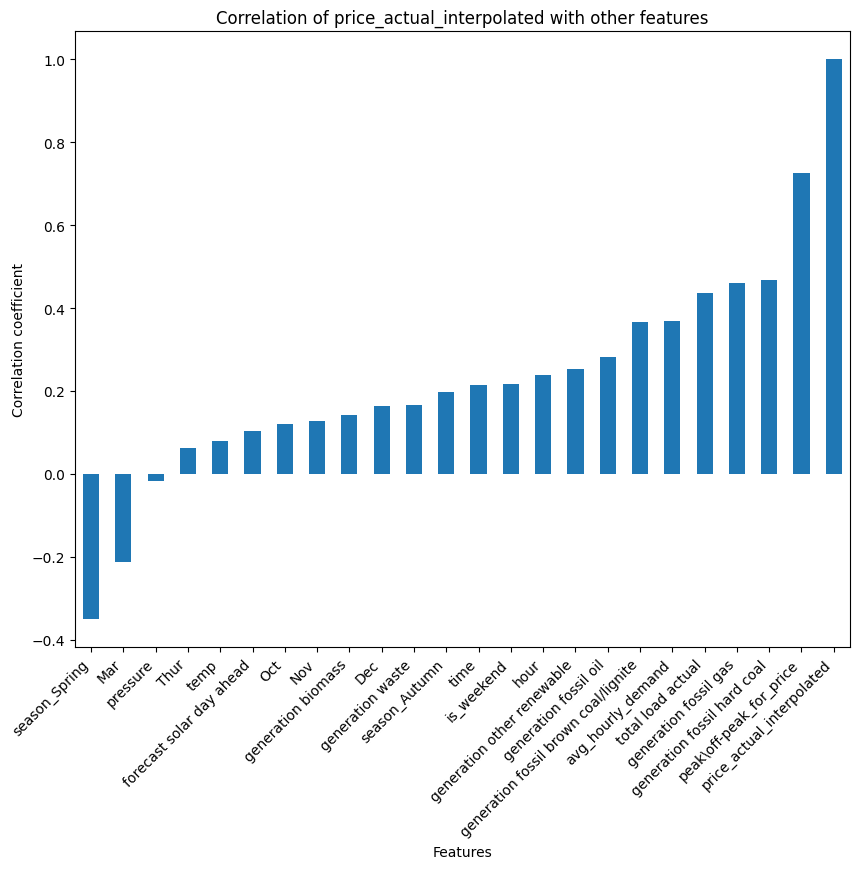

In [61]:
# Define the target columns
target_columns = ['price_actual_interpolated']

# Initialize a dictionary to hold positive correlations for each target column
correlations_dict = {}

for target_column in target_columns:
    # Calculate correlations of the target column with all other columns
    correlations = subset_data_price.corr()[target_column].sort_values()

    # Filter out correlations greater than 0.1
    correlations_dict[target_column] = set(correlations.index)

    # Print the columns with correlations greater than 0.1
    print(f"Columns correlations with target column {target_column}:")
    print(correlations)

    # Plot the correlations
    plt.figure(figsize=(10, 8))
    correlations.plot(kind='bar')
    plt.title(f'Correlation of {target_column} with other features')
    plt.xlabel('Features')
    plt.ylabel('Correlation coefficient')
    plt.xticks(rotation=45, ha='right')
    plt.show()

Columns correlations with target column total load actual:
generation hydro pumped storage consumption   -0.562769
humidity                                      -0.366059
wind_deg                                      -0.085287
weather_icon                                  -0.067611
pressure                                      -0.002189
weather_id                                     0.001192
generation wind onshore                        0.039788
time                                           0.048451
season_Winter                                  0.075699
generation biomass                             0.083438
generation nuclear                             0.085803
generation other                               0.100768
generation other renewable                     0.180955
wind_speed                                     0.194858
temp_max                                       0.198534
temp                                           0.203489
is_weekend                                   

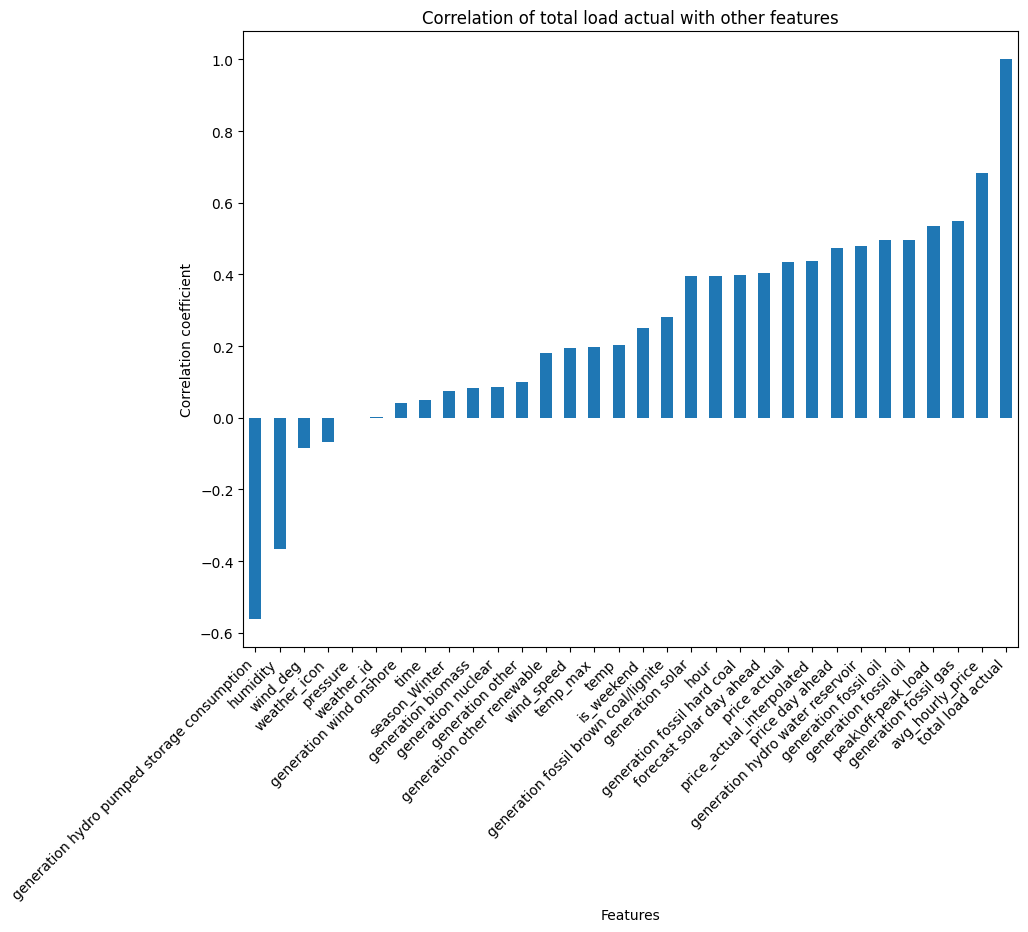

In [60]:
# Define the target columns
target_columns = ['total load actual']

# Initialize a dictionary to hold positive correlations for each target column
correlations_dict = {}

for target_column in target_columns:
    # Calculate correlations of the target column with all other columns
    correlations = subset_data_load.corr()[target_column].sort_values()

    # Filter out correlations greater than 0.1
    correlations_dict[target_column] = set(correlations.index)

    # Print the columns with correlations greater than 0.1
    print(f"Columns correlations with target column {target_column}:")
    print(correlations)

    # Plot the correlations
    plt.figure(figsize=(10, 8))
    correlations.plot(kind='bar')
    plt.title(f'Correlation of {target_column} with other features')
    plt.xlabel('Features')
    plt.ylabel('Correlation coefficient')
    plt.xticks(rotation=45, ha='right')
    plt.show()